In [31]:
# once i have wholegenome_offset.trees
import pandas as pd
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
from matplotlib import colors as mcolors
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 

poly_str_order = ['1',    '2',    '5',   '10',   '20',   '50',  '100',  '500', '1000']
optima_order = ['optima0', 'optima1', 'optima2', 'optima3', 'optima4', 'optima5', 'optima6']

In [32]:
heritability_data= {'1': 0.1,
'2': 0.3,
'3': 0.5,
'4': 0.7,
'5': 0.9}

optima_dict = {'optima7': 7,
               'optima6': 6,
               'optima5': 5,
               'optima4': 4,
               'optima3': 3,
               'optima2': 2,
               'optima1.5': 1.5,
               'optima1': 1,
               'optima0': 0}

def get_params(df):
    df = df.reset_index()
    df['index'] = df['index'].str.split('/subp').str[0]
    df['optima'] = df['index'].str.split('/').str[-1]
    df['sel'] = df['index'].str.split('/').str[-2]
    df['h2'] = df['index'].str.split('/').str[-3]
    df['poly'] = df['index'].str.split('_').str[-2]
    df['rep'] = df['index'].str.split('_').str[-1].str.split('/').str[0]
    df = df.drop('index',axis=1)
    return df

In [33]:
palette = sns.color_palette("viridis", 3)
h1_levels = [0.1, 0.5, 0.9]

In [34]:
path = '/global/scratch/users/tbellg/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [35]:
path = '/home/tbellagio/simulations/slim_grenenet_results/final_results_cteg_talk/scrapping_results/es_dep_af/'

In [36]:
pop_size = pd.read_csv(path + 'pop_size_early.csv', index_col=[0])
pop_size = get_params(pop_size)

In [37]:
pop_size = pop_size[pop_size['optima'] != 'optima1.5']

In [38]:
pop_size['optima'].unique()

array(['optima2', 'optima6', 'optima4', 'optima1', 'optima7', 'optima3',
       'optima5', 'optima0'], dtype=object)

In [39]:
vfitnes = pd.read_csv(path + 'vfitnes.csv', index_col=[0])
vfitnes = get_params(vfitnes)

In [40]:
vfitnes['vfitnes_gen0'] = vfitnes['0']

In [41]:
vfitnes = vfitnes[['optima', 'sel', 'h2', 'poly', 'rep', 'vfitnes_gen0']]

In [42]:
vfitnes = vfitnes[vfitnes['optima'] != 'optima1.5']

In [43]:
vfitnes['optima'].unique()

array(['optima2', 'optima6', 'optima4', 'optima1', 'optima7', 'optima3',
       'optima5', 'optima0'], dtype=object)

In [44]:
pop_size['survival']=  pop_size['9'].notna().astype(int)

In [45]:
pop_size['pop_size']=  pop_size['9']

In [46]:
survival = pop_size[['optima', 'sel', 'h2', 'poly', 'rep', 'survival']]

In [17]:
survivalship = survival.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].sum() / survival.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].size() 

In [ ]:
survivalship

In [50]:
survival.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].sum()

optima   sel         h2  poly   rep
optima0  estrongsel  1   pi1    1      0
                                10     0
                                11     0
                                12     0
                                13     0
                                      ..
optima7  estrongsel  5   pi500  5      0
                                6      0
                                7      0
                                8      0
                                9      0
Name: survival, Length: 8640, dtype: int64

In [ ]:
survivalship

In [48]:
survival.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['survival'].size() 

optima   sel         h2  poly   rep
optima0  estrongsel  1   pi1    1      5
                                10     5
                                11     5
                                12     5
                                13     5
                                      ..
optima7  estrongsel  5   pi500  5      5
                                6      5
                                7      5
                                8      5
                                9      5
Name: survival, Length: 8640, dtype: int64

In [19]:
pop_size = pop_size[['optima', 'sel', 'h2', 'poly', 'rep', 'pop_size']]

In [20]:
pop_size['pop_size'] = pop_size['pop_size'].fillna(0)

In [21]:
vfitnes = vfitnes.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['vfitnes_gen0'].mean()

In [22]:
pop_size = pop_size.groupby(['optima', 'sel', 'h2', 'poly', 'rep'])['pop_size'].mean()

In [23]:
survivalship_vfitnes = survivalship.reset_index().merge(vfitnes.reset_index(),on = ['optima', 'sel', 'h2', 'poly', 'rep']).merge(pop_size,on = ['optima', 'sel', 'h2', 'poly', 'rep'])

In [24]:
survivalship_vfitnes['poly'] = survivalship_vfitnes['poly'].str.replace('pi', '').astype(int)
survivalship_vfitnes['h2'] = survivalship_vfitnes['h2'].replace(heritability_data)

In [25]:
survivalship_vfitnes['log_poly'] = np.log10(survivalship_vfitnes['poly'])

In [26]:
survivalship_vfitnes['optima'].unique()

array(['optima0', 'optima1', 'optima2', 'optima3', 'optima4', 'optima5',
       'optima6', 'optima7'], dtype=object)

In [27]:
survivalship_vfitnes['poly_str'] = survivalship_vfitnes['poly'].astype(str)

In [28]:
survivalship_vfitnes['optima'].unique()

array(['optima0', 'optima1', 'optima2', 'optima3', 'optima4', 'optima5',
       'optima6', 'optima7'], dtype=object)

In [35]:
#optima1_h2['survival'] = np.log10(optima1_h2['survival'])

In [30]:
survivalship_vfitnes['survival'].value_counts()

survival
0.0    5679
1.0    1848
0.2     342
0.8     315
0.6     229
0.4     227
Name: count, dtype: int64

In [45]:
optima1_h2

optima         sel   h2  poly rep  survival   vfitnes_gen0  pop_size  \
540   optima0  estrongsel  0.7     1   1       1.0   8.099962e-02    3768.2   
541   optima0  estrongsel  0.7     1  10       1.0   8.034816e-02    3926.6   
542   optima0  estrongsel  0.7     1  11       1.0   8.428364e-02    4910.8   
543   optima0  estrongsel  0.7     1  12       1.0   8.242780e-02    4584.2   
544   optima0  estrongsel  0.7     1  13       1.0   8.342186e-02    4185.8   
...       ...         ...  ...   ...  ..       ...            ...       ...   
8365  optima7  estrongsel  0.7   500   5       0.0  5.214160e-144       0.0   
8366  optima7  estrongsel  0.7   500   6       0.0  1.706894e-106       0.0   
8367  optima7  estrongsel  0.7   500   7       0.0   6.885900e-57       0.0   
8368  optima7  estrongsel  0.7   500   8       0.0  1.144428e-169       0.0   
8369  optima7  estrongsel  0.7   500   9       0.0   1.370934e-80       0.0   

      log_poly poly_str  survival_jittered  
540    0.00000        1        3768.179964  
541    0.00000        1        3926.605321  
542    0.00000        1        4910.792972  
543    0.00000        1        4584.176759  
544    0.00000        1        4185.823660  
...        ...      ...                ...  
8365   2.69897      500          -0.029450  
8366   2.69897      500          -0.023708  
8367   2.69897      500          -0.014819  
8368   2.69897      500           0.010453  
8369   2.69897      500          -0.003703  

[2160 rows x 11 columns]

In [41]:
optima1_h2 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]
palette = sns.color_palette("viridis", 9)


# Predictor and Response remain the same
X = optima1_h2['vfitnes_gen0']  # Predictor
y = optima1_h2['pop_size']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
ols_mod = sm.OLS(y, x_with_intercept)
logit_res = ols_mod.fit() #_regularized(method='l1')  # Example with L1 regularization

# Get the slope (coefficient of 'survival') and p-value
slope = logit_res.params['vfitnes_gen0']
p_value = logit_res.pvalues['vfitnes_gen0']
t_value = logit_res.params['vfitnes_gen0'] / logit_res.bse['vfitnes_gen0']

# Create a dense range of predictor values
x_dense = np.linspace(X.min(), X.max(), 500)
x_dense_with_intercept = sm.add_constant(x_dense)

# Generate predicted probabilities for the dense range
predicted_probs_dense = logit_res.predict(x_dense_with_intercept)

# Create a DataFrame for the dense range predictions
dense_predictions = pd.DataFrame({
    'vfitnes_gen0': x_dense,
    'predicted_prob': predicted_probs_dense
})



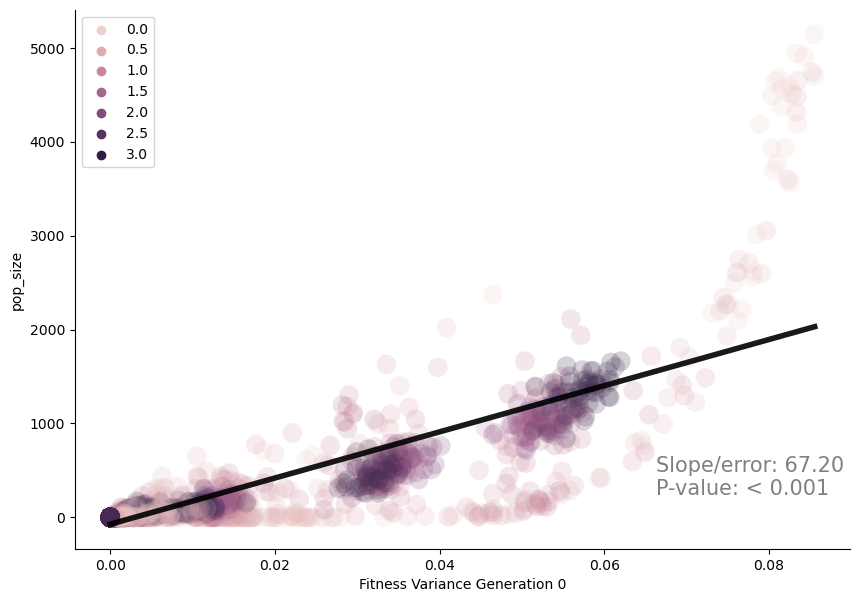

In [49]:
# Plotting
plt.figure(figsize=(10, 7))

# Adding jitter to the 'y' values
jitter_amount = 0.03  # Adjust this value as needed based on your data's scale
#optima1_h2.loc[:, 'survival_jittered'] = optima1_h2['pop_size'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))

# Scatter plot with jittered survival values
scatter_plot = sns.scatterplot(data=optima1_h2, x='vfitnes_gen0', y='pop_size',hue = 'log_poly',
                               alpha=0.2, linewidth=0, color='grey', hue_order=poly_str_order,
                               s = 200)
                               #size='poly_str', sizes=(5, 200))

# Logistic regression curve
#sns.lineplot(data=optima1_h2, x='vfitnes_gen0', y='predicted_prob', color="#440154", ax=scatter_plot)
sns.lineplot(data=dense_predictions, x='vfitnes_gen0', y='predicted_prob', color="black",
            linewidth=4, alpha = 0.9)


# Format p-value
p_value_text = f"P-value: {p_value:.2f}" if p_value >= 0.001 else "P-value: < 0.001"

# Add text with slope, t-value, and p-value
plt.text(0.75, 0.1, f'Slope/error: {t_value:.2f}\n{p_value_text}', transform=plt.gca().transAxes,
        fontsize=15,  # Adjust font size
         color='grey')  # Adjust position as needed

plt.xlabel('Fitness Variance Generation 0')
#plt.ylabel('Survivorship')
sns.despine()
# Show the plot
plt.show()

Optimization terminated successfully.
         Current function value: 0.322723
         Iterations 9


/tmp/ipykernel_450952/3322287546.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima1_h2.loc[:, 'survival_jittered'] = optima1_h2['survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))


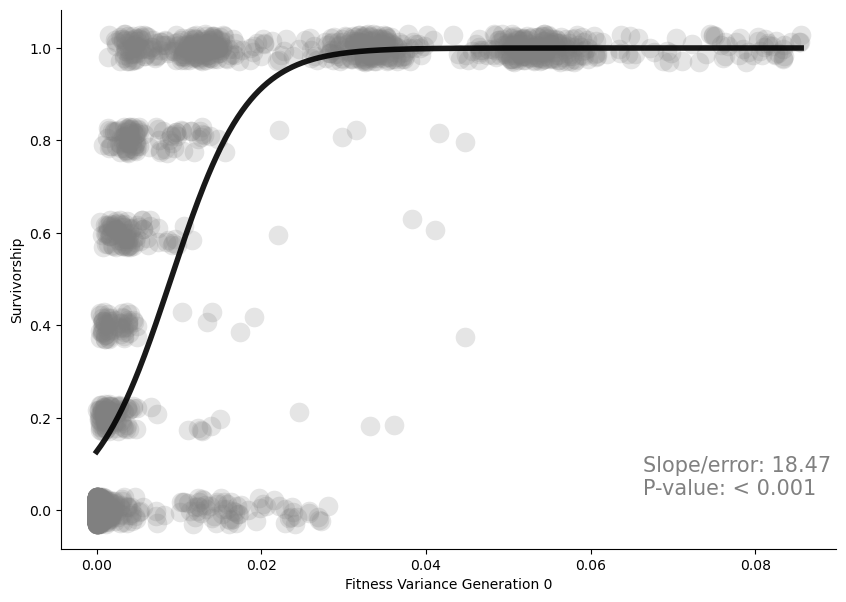

In [50]:
optima1_h2 = survivalship_vfitnes[survivalship_vfitnes['h2']==0.7]
palette = sns.color_palette("viridis", 9)


# Predictor and Response remain the same
X = optima1_h2['vfitnes_gen0']  # Predictor
y = optima1_h2['survival']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
logit_mod = sm.Logit(y, x_with_intercept)
logit_res = logit_mod.fit() #_regularized(method='l1')  # Example with L1 regularization

# Get the slope (coefficient of 'survival') and p-value
slope = logit_res.params['vfitnes_gen0']
p_value = logit_res.pvalues['vfitnes_gen0']
t_value = logit_res.params['vfitnes_gen0'] / logit_res.bse['vfitnes_gen0']

# Create a dense range of predictor values
x_dense = np.linspace(X.min(), X.max(), 500)
x_dense_with_intercept = sm.add_constant(x_dense)

# Generate predicted probabilities for the dense range
predicted_probs_dense = logit_res.predict(x_dense_with_intercept)

# Create a DataFrame for the dense range predictions
dense_predictions = pd.DataFrame({
    'vfitnes_gen0': x_dense,
    'predicted_prob': predicted_probs_dense
})

# Plotting
plt.figure(figsize=(10, 7))

# Adding jitter to the 'y' values
jitter_amount = 0.03  # Adjust this value as needed based on your data's scale
optima1_h2.loc[:, 'survival_jittered'] = optima1_h2['survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))

# Scatter plot with jittered survival values
scatter_plot = sns.scatterplot(data=optima1_h2, x='vfitnes_gen0', y='survival_jittered',
                               alpha=0.2, linewidth=0, color='grey', hue_order=poly_str_order,
                               s = 200)
                               #size='poly_str', sizes=(5, 200))

# Logistic regression curve
#sns.lineplot(data=optima1_h2, x='vfitnes_gen0', y='predicted_prob', color="#440154", ax=scatter_plot)
sns.lineplot(data=dense_predictions, x='vfitnes_gen0', y='predicted_prob', color="black",
            linewidth=4, alpha = 0.9)


# Format p-value
p_value_text = f"P-value: {p_value:.2f}" if p_value >= 0.001 else "P-value: < 0.001"

# Add text with slope, t-value, and p-value
plt.text(0.75, 0.1, f'Slope/error: {t_value:.2f}\n{p_value_text}', transform=plt.gca().transAxes,
        fontsize=15,  # Adjust font size
         color='grey')  # Adjust position as needed

plt.xlabel('Fitness Variance Generation 0')
plt.ylabel('Survivorship')
sns.despine()
plt.savefig('figures/survivorship_vs_fitness_var_nohue.png', transparent=True, dpi=300)
plt.savefig('figures/survivorship_vs_fitness_var_nohue.svg', transparent=True)

# Show the plot
plt.show()


In [41]:
survivalship_vfitnes_h07['optima'].unique()

array(['optima0', 'optima1', 'optima2', 'optima3', 'optima4', 'optima5',
       'optima6', 'optima7'], dtype=object)

In [42]:
survivalship_vfitnes_h07['optima_f'].unique()

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [43]:
dense_predictions

optima_f  predicted_prob
0    0.000000        0.065401
1    0.014028        0.064515
2    0.028056        0.063640
3    0.042084        0.062776
4    0.056112        0.061923
..        ...             ...
495  6.943888        0.000051
496  6.957916        0.000050
497  6.971944        0.000050
498  6.985972        0.000049
499  7.000000        0.000048

[500 rows x 2 columns]

/tmp/ipykernel_450952/2655651486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  survivalship_vfitnes_h07['optima_f'] = survivalship_vfitnes_h07['optima'].str.replace('optima', '').astype(float)


Optimization terminated successfully.
         Current function value: 0.017342
         Iterations 11


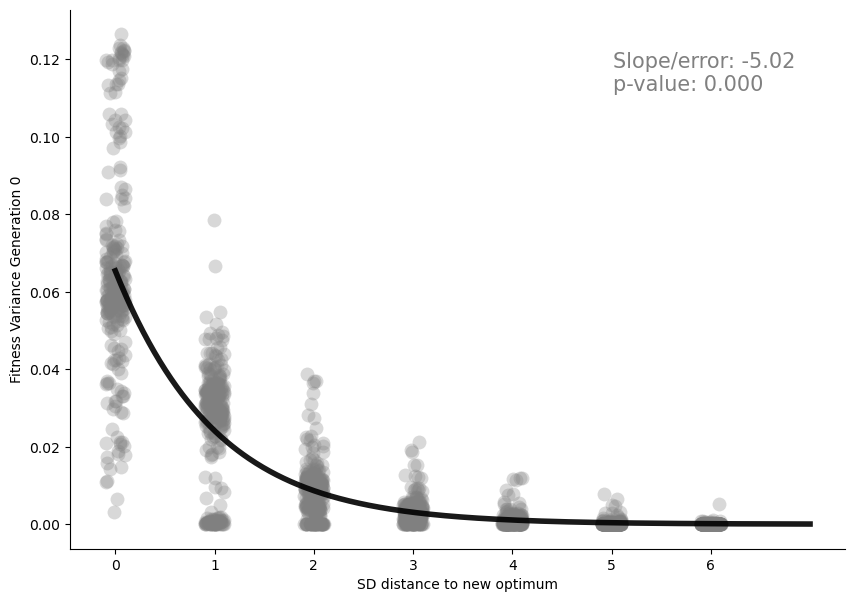

In [161]:
# Filtering and data preparation
survivalship_vfitnes_h07 = survivalship_vfitnes[survivalship_vfitnes['h2'] == 0.9]
survivalship_vfitnes_h07['optima_f'] = survivalship_vfitnes_h07['optima'].str.replace('optima', '').astype(float)

X = survivalship_vfitnes_h07['optima_f']  # Predictor
y = survivalship_vfitnes_h07['vfitnes_gen0']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS)
logit_mod = sm.Logit(y, x_with_intercept)
logit_res = logit_mod.fit()

# Create a dense range of predictor values
x_dense = np.linspace(X.min(), X.max(), 500)
x_dense_with_intercept = sm.add_constant(x_dense)

# Generate predicted probabilities for the dense range
predicted_probs_dense = logit_res.predict(x_dense_with_intercept)

# Create a DataFrame for the dense range predictions
dense_predictions = pd.DataFrame({
    'optima_f': x_dense,
    'predicted_prob': predicted_probs_dense
})

# Get the slope (coefficient of 'optima_f') and p-value
slope = logit_res.params['optima_f']
p_value = logit_res.pvalues['optima_f']
t_value = logit_res.params['optima_f'] / logit_res.bse['optima_f']
p_value_text = f'p-value: {p_value:.3f}'

# Plotting
plt.figure(figsize=(10, 7))

# Stripplot with specific order
sns.stripplot(data=survivalship_vfitnes_h07, x="optima", y="vfitnes_gen0", color="grey", size=10, alpha=0.3, order=optima_order, zorder=1)

# Lineplot for the logistic fit
sns.lineplot(data=dense_predictions, x='optima_f', y='predicted_prob', color="black", linewidth=4, alpha=0.9, zorder=2)

# Adding text for slope and p-value
plt.text(0.7, 0.85, f'Slope/error: {t_value:.2f}\n{p_value_text}', transform=plt.gca().transAxes,
         fontsize=15, color='grey')

# Setting custom x-ticks
plt.xticks(ticks=np.arange(7), labels=[0, 1, 2, 3, 4, 5, 6])
sns.despine()
# Renaming axes
plt.xlabel('SD distance to new optimum')
plt.ylabel('Fitness Variance Generation 0')
plt.savefig('figures/fitness_var_across_optima_nohue.png', transparent=True, dpi=300)
plt.savefig('figures/fitness_var_across_optima_nohue.svg', transparent=True)


plt.show()

/tmp/ipykernel_441847/4265027972.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optima_h2['predicted_prob'] = logit_res.predict(x_with_intercept)
/tmp/ipykernel_441847/4265027972.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_optima_h2.replace([np.inf, -np.inf], np.nan, inplace=True)
/tmp/ipykernel_441847/4265027972.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

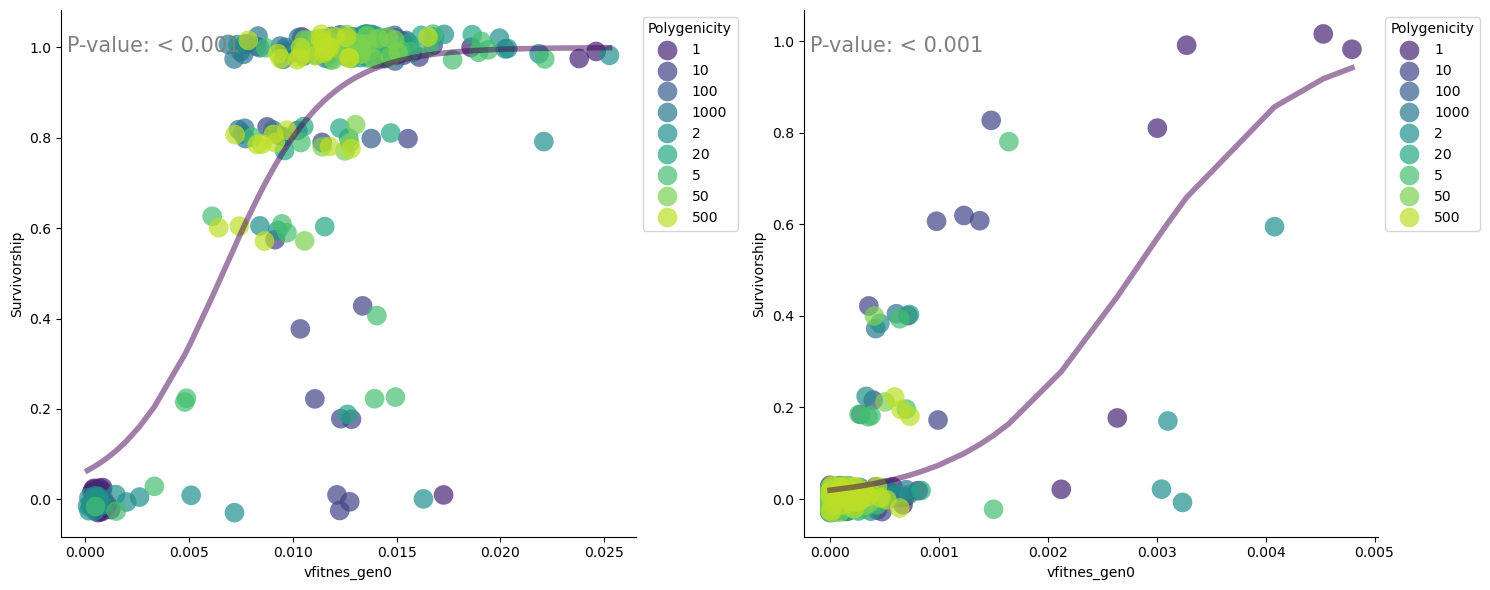

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assume survivalship_vfitnes is already loaded and available
palette = sns.color_palette("viridis", 9)

# Define the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharex=False)

# List of optimas to iterate over
optimas = ['optima2', 'optima5']

# Iterate through the list of optimas and create a plot for each
for i, optima in enumerate(optimas):
    df_optima = survivalship_vfitnes[survivalship_vfitnes['optima'] == optima]
    df_optima_h2 = df_optima[df_optima['h2'] == 0.7]

    X = df_optima_h2['vfitnes_gen0']  # Predictor
    y = df_optima_h2['survival']  # Response

    # Adding a constant to the predictor for the intercept
    x_with_intercept = sm.add_constant(X)

    # Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
    logit_mod = sm.Logit(y, x_with_intercept)
    logit_res = logit_mod.fit(disp=0)  # Suppress output

    # Generate predicted probabilities from the logistic model
    df_optima_h2['predicted_prob'] = logit_res.predict(x_with_intercept)

    # Convert infinite values to NaNs if any
    df_optima_h2.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Adding jitter to the 'y' values
    jitter_amount = 0.03  # Adjust this value as needed based on your data's scale
    df_optima_h2['survival_jittered'] = df_optima_h2['survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(df_optima_h2))

    # Scatter plot with jittered survival values
    sns.scatterplot(data=df_optima_h2, x='vfitnes_gen0', y='survival_jittered', hue='poly_str', alpha=0.7,
                    linewidth=0, palette=palette, ax=axes[i], s=200)

    # Logistic regression curve
    sns.lineplot(data=df_optima_h2, x='vfitnes_gen0', y='predicted_prob', color="#440154", ax=axes[i],
                 linewidth=4, alpha=0.5)

    # Format and display p-value
    p_value = logit_res.pvalues['vfitnes_gen0']
    p_value_text = f"P-value: {p_value:.4f}" if p_value >= 0.001 else "P-value: < 0.001"
    axes[i].text(0.01, 0.92, p_value_text, transform=axes[i].transAxes, fontsize=15, color='grey')

    # Set axis labels
    axes[i].set_xlabel('vfitnes_gen0')
    axes[i].set_ylabel('Survivorship')
    axes[i].legend(loc='upper left', bbox_to_anchor=(1, 1), title='Polygenicity')

    sns.despine()

# Adjust spacing between plots
plt.tight_layout()
plt.show()


In [154]:
palette = sns.color_palette("Greens", as_cmap=False)

In [158]:
custom_cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom_greens", 
    sns.color_palette("Greens", 256)[100:],  # Skip the lightest colors
    N=256
)

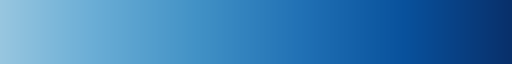

In [156]:
custom_cmap

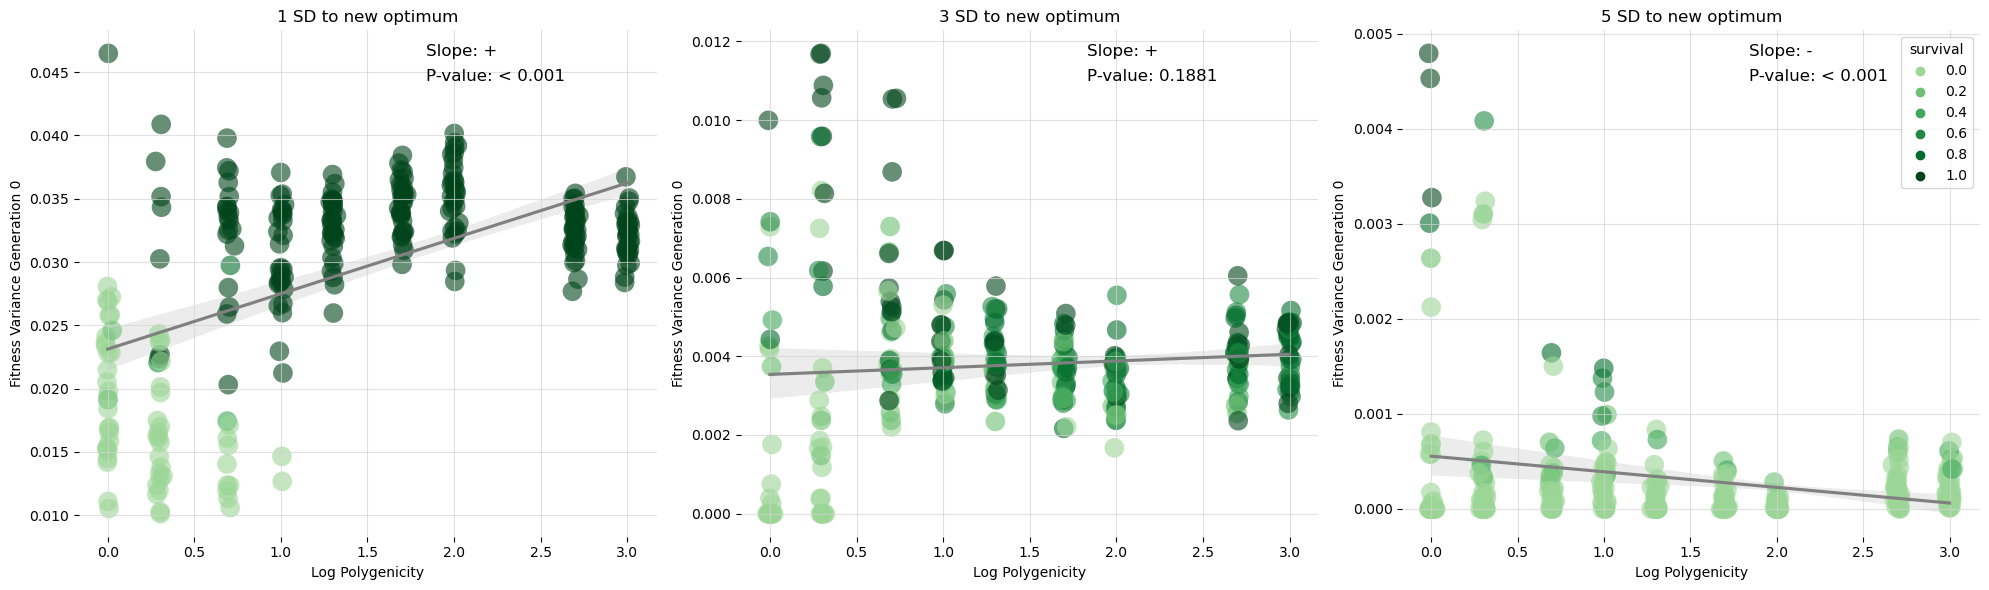

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Define the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# List of optimas to iterate over
optimas = ['optima1', 'optima3', 'optima5']
for i, optima in enumerate(optimas):
    df_optima = survivalship_vfitnes[survivalship_vfitnes['optima'] == optima]
    df_optima_h2 = df_optima[df_optima['h2'] == 0.7]
    scale = 0.01
    jitter = np.random.normal(scale=scale, size=len(df_optima_h2))
    
    # Fit the OLS model
    X = sm.add_constant(df_optima_h2['log_poly'])  # Predictor with intercept
    y = df_optima_h2['vfitnes_gen0']  # Response
    model = sm.OLS(y, X).fit()
    slope = model.params['log_poly']
    p_value = model.pvalues['log_poly']
    
    # Plot the regression line
    sns.regplot(data=df_optima_h2, x='log_poly', y='vfitnes_gen0', scatter=False, ax=axes[i],
                line_kws={'color': 'grey'})
    
    # Scatter plot with jitter added to x-values
    sns.scatterplot(data=df_optima_h2, x=df_optima_h2['log_poly'] + jitter, y='vfitnes_gen0', hue='survival', palette=custom_cmap, linewidth=0,
                    s=200, alpha=0.6, ax=axes[i])

    # Annotations for slope and p-value
    slope_text = f"Slope: {'+' if slope >= 0 else '-'}"
    p_value_text = f"P-value: {p_value:.4f}" if p_value >= 0.001 else "P-value: < 0.001"
    axes[i].text(0.6, 0.95, slope_text, transform=axes[i].transAxes, fontsize=12, color='black')
    axes[i].text(0.6, 0.90, p_value_text, transform=axes[i].transAxes, fontsize=12, color='black')
    
    # Customize the axes and legend
    optima_str = optima.replace('optima', '')
    axes[i].set_title(f'{optima_str} SD to new optimum')
    axes[i].set_xlabel('Log Polygenicity')
    axes[i].set_ylabel('Fitness Variance Generation 0')

    # Customizing the plot aesthetics
    axes[i].spines['left'].set_visible(False)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].grid(True, color='lightgrey', alpha=0.7)

# Remove individual legends from all but the last plot
for ax in axes[:-1]:
    ax.get_legend().remove()

# Adjust spacing between plots
plt.tight_layout()

plt.savefig('figures/fitness_var_vs_logpoly_hue_survival.png', transparent=True, dpi=300)
plt.savefig('figures/fitness_var_vs_logpoly_hue_survival.svg', transparent=True)

plt.show()


In [149]:
axes[-1].get_legend_handles_labels()

([], [])

Optimization terminated successfully.
         Current function value: 0.020809
         Iterations 8


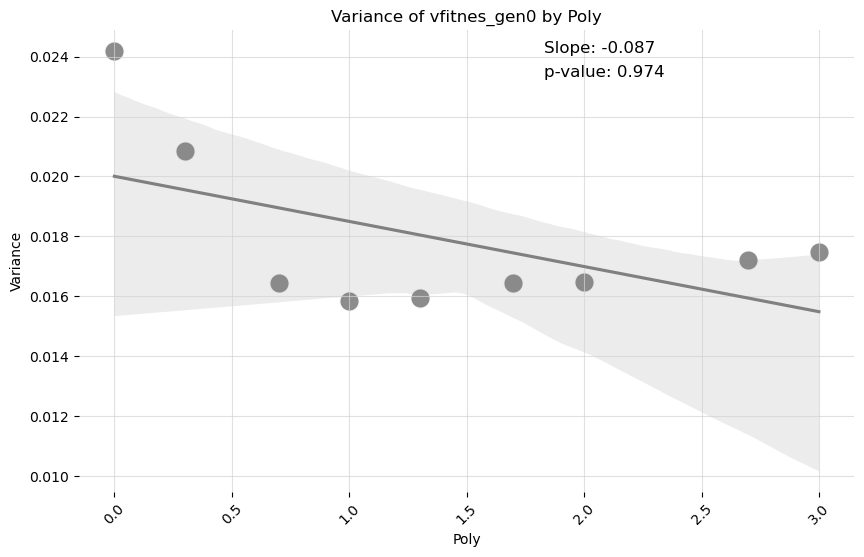

In [136]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Assume 'variance_data' and 'survivalship_vfitnes' are predefined DataFrames

# Compute the variance
variance_data = survivalship_vfitnes.groupby('log_poly')['vfitnes_gen0'].std().reset_index()
variance_data.columns = ['log_poly', 'variance']

X = variance_data['log_poly']  # Predictor
y = variance_data['variance']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS)
logit_mod = sm.Logit(y, x_with_intercept)
logit_res = logit_mod.fit()

# Create a dense range of predictor values
x_dense = np.linspace(X.min(), X.max(), 500)
x_dense_with_intercept = sm.add_constant(x_dense)

# Generate predicted probabilities for the dense range
predicted_probs_dense = logit_res.predict(x_dense_with_intercept)

# Create a DataFrame for the dense range predictions
dense_predictions = pd.DataFrame({
    'log_poly': x_dense,
    'predicted_prob': predicted_probs_dense
})

# Get the slope (coefficient of 'log_poly') and p-value
slope = logit_res.params['log_poly']
p_value = logit_res.pvalues['log_poly']
t_value = logit_res.params['log_poly'] / logit_res.bse['log_poly']
slope_text = f'Slope: {slope:.3f}'
p_value_text = f'p-value: {p_value:.3f}'

# Plotting the scatter and regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='log_poly', y='variance', data=variance_data, color='grey', s=200, alpha=0.9)
sns.regplot(x='log_poly', y='variance', data=variance_data, color='grey', scatter=False, order=1)

# Adding text for slope and p-value
plt.text(0.6, 0.95, slope_text, transform=plt.gca().transAxes, fontsize=12, color='black')
plt.text(0.6, 0.90, p_value_text, transform=plt.gca().transAxes, fontsize=12, color='black')

# Customizing the plot aesthetics
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True, color='lightgrey', alpha=0.7)
plt.title('Variance of vfitnes_gen0 by Poly')
plt.xlabel('Poly')
plt.ylabel('Variance')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()


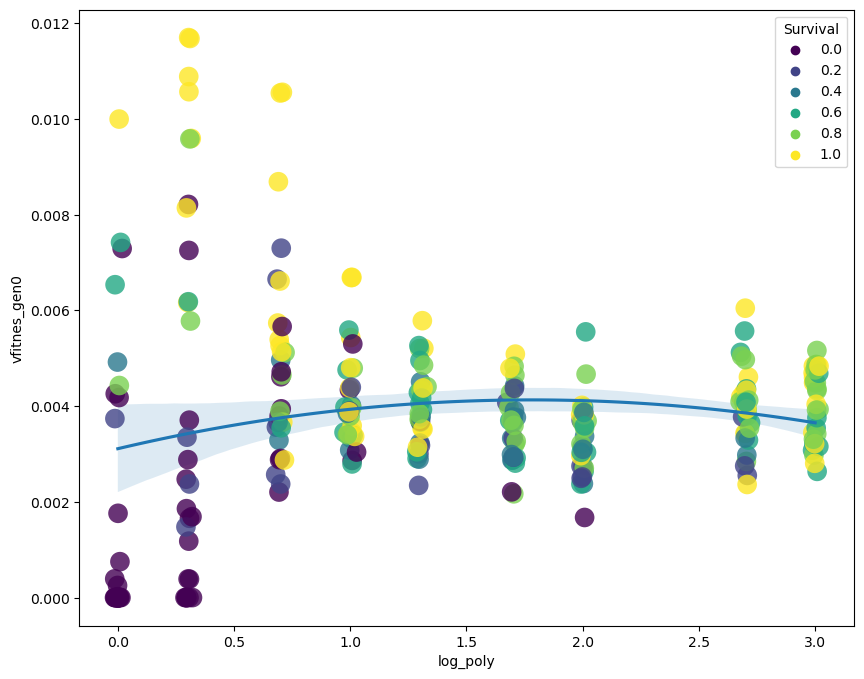

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming optima2_h2 is your DataFrame and it's already defined
optima2 = survivalship_vfitnes[survivalship_vfitnes['optima'].isin(['optima3',])]
optima2_h2 = optima2[optima2['h2']==0.7]
# Adding jitter to the 'log_poly' values
# 'scale' controls the amount of jitter. Adjust it to suit the scale of your plot.
scale = 0.01
jitter = np.random.normal(scale=scale, size=len(optima2_h2))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the regression line
sns.regplot(data=optima2_h2, x='log_poly', y='vfitnes_gen0', scatter=False, order=2, ax=ax)

# Scatter plot with jitter added to x-values
sns.scatterplot(data = optima2_h2, x=optima2_h2['log_poly'] + jitter, y=optima2_h2['vfitnes_gen0'], hue='survival', palette="viridis", linewidth=0,
                s=200, alpha=0.8, ax=ax, )

# Adjust legend and labels as needed
plt.legend(title='Survival')

# Optional: Set the x-axis limits if needed, adjust based on the scale of your jitter and data
# ax.set_xlim(optima2_h2['log_poly'].min() - 0.2, optima2_h2['log_poly'].max() + 0.2)

plt.show()


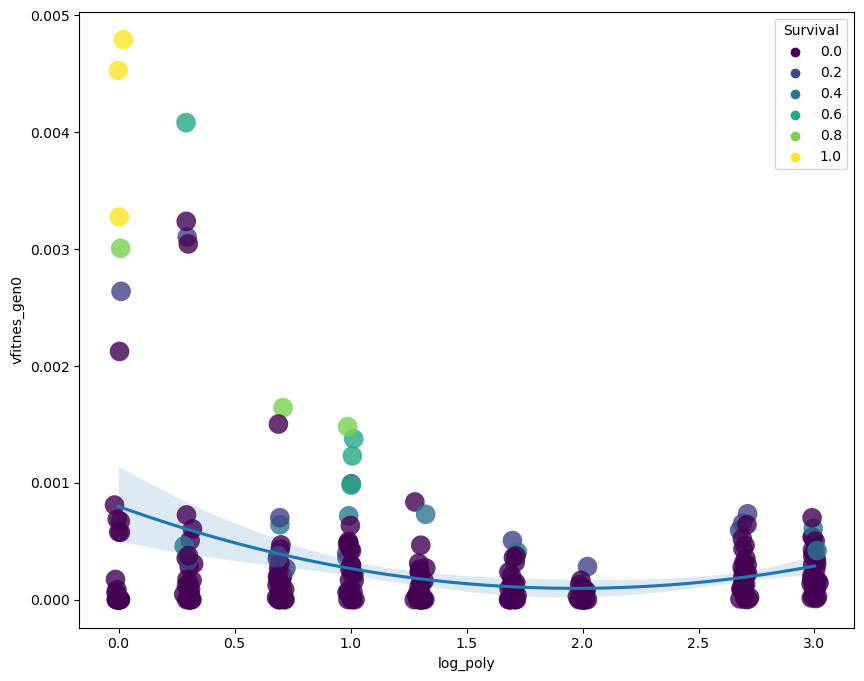

In [69]:
# Assuming optima2_h2 is your DataFrame and it's already defined
optima2 = survivalship_vfitnes[survivalship_vfitnes['optima'].isin(['optima5',])]
optima2_h2 = optima2[optima2['h2']==0.7]
# Adding jitter to the 'log_poly' values
# 'scale' controls the amount of jitter. Adjust it to suit the scale of your plot.
scale = 0.01
jitter = np.random.normal(scale=scale, size=len(optima2_h2))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the regression line
sns.regplot(data=optima2_h2, x='log_poly', y='vfitnes_gen0', scatter=False, order=2, ax=ax)

# Scatter plot with jitter added to x-values
sns.scatterplot(data = optima2_h2, x=optima2_h2['log_poly'] + jitter, y=optima2_h2['vfitnes_gen0'], hue='survival', palette="viridis", linewidth=0,
                s=200, alpha=0.8, ax=ax, )

# Adjust legend and labels as needed
plt.legend(title='Survival')

# Optional: Set the x-axis limits if needed, adjust based on the scale of your jitter and data
# ax.set_xlim(optima2_h2['log_poly'].min() - 0.2, optima2_h2['log_poly'].max() + 0.2)

plt.show()

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming optima2_h2 is your DataFrame and it's already defined
optima2 = survivalship_vfitnes[survivalship_vfitnes['optima'].isin(['optima1',])]
optima2_h2 = optima2[optima2['h2']==0.7]
# Adding jitter to the 'log_poly' values
# 'scale' controls the amount of jitter. Adjust it to suit the scale of your plot.
scale = 0.01
jitter = np.random.normal(scale=scale, size=len(optima2_h2))

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the regression line
sns.regplot(data=optima2_h2, x='log_poly', y='vfitnes_gen0', scatter=False, order=2, ax=ax)

# Scatter plot with jitter added to x-values
sns.scatterplot(data = optima2_h2, x=optima2_h2['log_poly'] + jitter, y=optima2_h2['vfitnes_gen0'], hue='survival', palette="viridis", 
                s=150, alpha=0.8, ax=ax, )

# Adjust legend and labels as needed
plt.legend(title='Survival')

# Optional: Set the x-axis limits if needed, adjust based on the scale of your jitter and data
# ax.set_xlim(optima2_h2['log_poly'].min() - 0.2, optima2_h2['log_poly'].max() + 0.2)

plt.show()

array([0.01860432, 0.01904428, 0.01947802, 0.01990556, 0.02032688,
       0.02074198, 0.02115088, 0.02155356, 0.02195003, 0.02234029,
       0.02272433, 0.02310217, 0.02347379, 0.02383919, 0.02419839,
       0.02455137, 0.02489814, 0.0252387 , 0.02557305, 0.02590118,
       0.0262231 , 0.02653881, 0.0268483 , 0.02715159, 0.02744866,
       0.02773952, 0.02802417, 0.0283026 , 0.02857482, 0.02884083,
       0.02910063, 0.02935421, 0.02960158, 0.02984274, 0.03007769,
       0.03030642, 0.03052895, 0.03074526, 0.03095535, 0.03115924,
       0.03135691, 0.03154837, 0.03173362, 0.03191265, 0.03208548,
       0.03225209, 0.03241249, 0.03256667, 0.03271465, 0.03285641,
       0.03299195, 0.03312129, 0.03324441, 0.03336133, 0.03347202,
       0.03357651, 0.03367478, 0.03376685, 0.03385269, 0.03393233,
       0.03400576, 0.03407297, 0.03413397, 0.03418875, 0.03423733,
       0.03427969, 0.03431584, 0.03434578, 0.0343695 , 0.03438702,
       0.03439832, 0.0344034 , 0.03440228, 0.03439494, 0.03438

In [44]:
# Plot the polynomial regression line
ax.plot(x_values, y_values, color='red', linewidth=2)  # 

In [45]:
x_values

array([0.        , 0.03030303, 0.06060606, 0.09090909, 0.12121212,
       0.15151515, 0.18181818, 0.21212121, 0.24242424, 0.27272727,
       0.3030303 , 0.33333333, 0.36363636, 0.39393939, 0.42424242,
       0.45454545, 0.48484848, 0.51515152, 0.54545455, 0.57575758,
       0.60606061, 0.63636364, 0.66666667, 0.6969697 , 0.72727273,
       0.75757576, 0.78787879, 0.81818182, 0.84848485, 0.87878788,
       0.90909091, 0.93939394, 0.96969697, 1.        , 1.03030303,
       1.06060606, 1.09090909, 1.12121212, 1.15151515, 1.18181818,
       1.21212121, 1.24242424, 1.27272727, 1.3030303 , 1.33333333,
       1.36363636, 1.39393939, 1.42424242, 1.45454545, 1.48484848,
       1.51515152, 1.54545455, 1.57575758, 1.60606061, 1.63636364,
       1.66666667, 1.6969697 , 1.72727273, 1.75757576, 1.78787879,
       1.81818182, 1.84848485, 1.87878788, 1.90909091, 1.93939394,
       1.96969697, 2.        , 2.03030303, 2.06060606, 2.09090909,
       2.12121212, 2.15151515, 2.18181818, 2.21212121, 2.24242

<Axes: xlabel='log_poly', ylabel='vfitnes_gen0'>

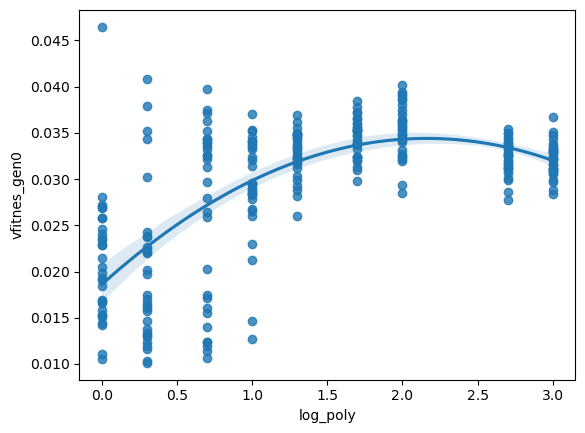

In [89]:
sns.regplot(data=optima2_h2, x='log_poly', y='vfitnes_gen0',order=2)

<Axes: xlabel='log_poly', ylabel='vfitnes_gen0'>

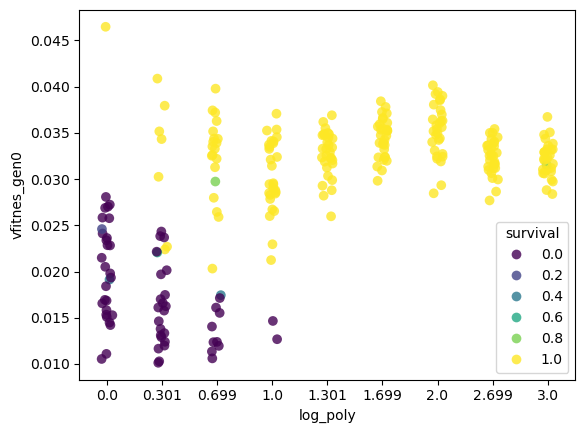

In [80]:
sns.stripplot(data=optima2_h2, x="log_poly", y="vfitnes_gen0", hue='survival', palette="viridis", size=7, alpha=0.8)


<Axes: xlabel='vfitnes_gen0', ylabel='survival'>

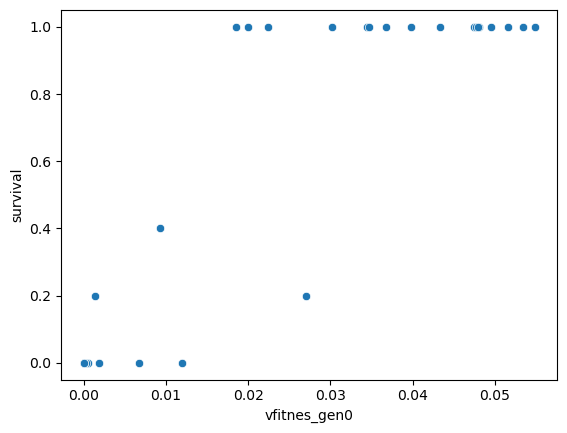

In [42]:
poly1 = optima1_h2[optima1_h2['poly'] == 5]

sns.scatterplot(data = poly1, x = 'vfitnes_gen0', y= 'survival')

<AxesSubplot:xlabel='vfitnes_gen0', ylabel='survival'>

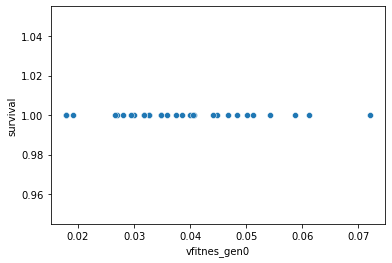

In [116]:
poly1 = optima1_h2[optima1_h2['poly'] == 20]

sns.scatterplot(data = poly1, x = 'vfitnes_gen0', y= 'survival')

/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


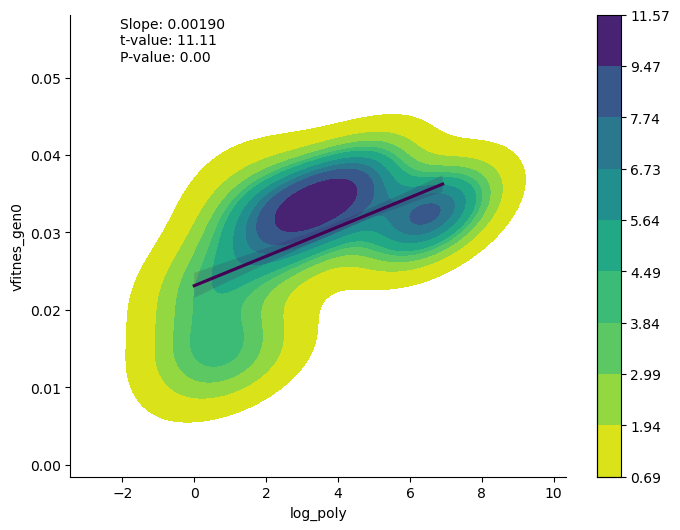

In [18]:
# Predictor and Response remain the same
X = optima1_h2['log_poly']  # Predictor
y = optima1_h2['vfitnes_gen0']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['log_poly']
p_value = linear_res.pvalues['log_poly']
t_value = slope / linear_res.bse['log_poly']

# Plotting
plt.figure(figsize=(8, 6))
sns.kdeplot(data=optima1_h2, x='log_poly', y='vfitnes_gen0', cmap="viridis_r", fill=True, bw_adjust=1.3, cbar=True)

sns.regplot(data=optima1_h2, x='log_poly', y='vfitnes_gen0', scatter=False, color="#440154")
plt.text(0.1, 0.9, f'Slope: {slope:.5f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('log_poly')
plt.ylabel('vfitnes_gen0')
sns.despine()

plt.show()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.1785897491783572
            Iterations: 20
            Function evaluations: 31
            Gradient evaluations: 20


/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:71: ConvergenceWarning: QC check did not pass for 1 out of 2 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
  warnings.warn(message, ConvergenceWarning)
/global/software/rocky-8.x86_64/manual/modules/langs/anaconda3/2024.02-1/lib/python3.11/site-packages/statsmodels/base/l1_solvers_common.py:144: ConvergenceWarning: Could not trim params automatically due to failed QC check. Trimming using trim_mode == 'size' will still work.
  warnings.warn(msg, ConvergenceWarning)
/tmp/ipykernel_2061601/2047038504.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

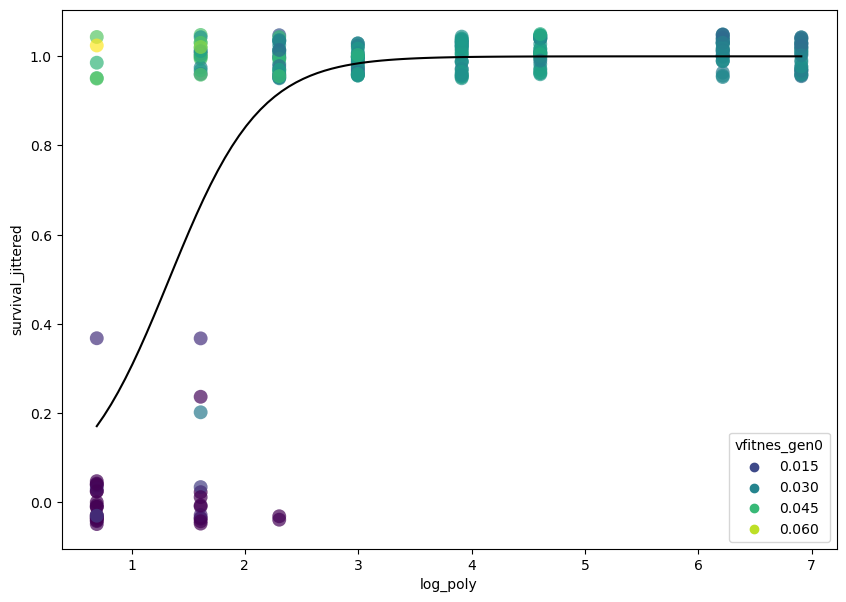

In [43]:
palette = sns.color_palette("viridis", 7)

# Assuming 'test' is your DataFrame with 'poly' and 'survival' columns

# Predictor and Response remain the same
X = optima1_h2['log_poly']  # Predictor
y = optima1_h2['survival']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
logit_mod = sm.Logit(y, x_with_intercept)
logit_res = logit_mod.fit_regularized(method='l1', L1_wt=0, alpha =0.1)   

# Generate predictions
x_range = np.linspace(optima1_h2['log_poly'].min(), optima1_h2['log_poly'].max(), 100)
x_range_with_intercept = sm.add_constant(x_range)
y_pred = logit_res.predict(x_range_with_intercept)


# Get the slope (coefficient of 'survival') and p-value
slope = logit_res.params['log_poly']
p_value = logit_res.pvalues['log_poly']
t_value = logit_res.params['log_poly'] / logit_res.bse['log_poly']

# Define a continuous color palette for 'vfitnes_gen0'
norm = plt.Normalize(optima1_h2['vfitnes_gen0'].min(), optima1_h2['vfitnes_gen0'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Plotting
plt.figure(figsize=(10, 7)) 
jitter_amount = 0.05  # Adjust this value as needed based on your data's scale
optima1_h2.loc[:,'survival_jittered'] = optima1_h2.loc[:,'survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))

# Plotting
sns.scatterplot(data=optima1_h2, x='log_poly', y='survival_jittered', hue='vfitnes_gen0', alpha=0.7, s=100,linewidth=0, palette="viridis")
plt.plot(x_range, y_pred, color='black', label='Logit Model')

plt.colorbar(sm, label='vfitnes_gen0')

plt.text(0.8, 0.5, f'Slope: {slope:.2f}\nt-value: {t_value:.2f}\nP-value: {p_value:.4f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('log_poly')
plt.ylabel('Survivorship')
sns.despine()

plt.show();

In [44]:
optima1_h2['str_log_poly'] = optima1_h2['log_poly'].astype(str)
optima1_h2['str_survival'] = optima1_h2['survival'].astype(str)

/tmp/ipykernel_2061601/3430736307.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima1_h2['str_log_poly'] = optima1_h2['log_poly'].astype(str)
/tmp/ipykernel_2061601/3430736307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima1_h2['str_survival'] = optima1_h2['survival'].astype(str)


In [48]:
optima2

optima         sel   h2  poly rep  survival  vfitnes_gen0  log_poly  \
2970  optima2  estrongsel  0.1     2   9       0.0      0.017738  0.693147   
2969  optima2  estrongsel  0.1     2   8       0.0      0.017740  0.693147   
2967  optima2  estrongsel  0.1     2   6       0.0      0.017376  0.693147   
2968  optima2  estrongsel  0.1     2   7       0.0      0.016970  0.693147   
2966  optima2  estrongsel  0.1     2   5       0.0      0.016936  0.693147   
...       ...         ...  ...   ...  ..       ...           ...       ...   
2913  optima2  estrongsel  0.1  1000   1       0.0      0.016410  6.907755   
2914  optima2  estrongsel  0.1  1000  10       0.0      0.018303  6.907755   
2915  optima2  estrongsel  0.1  1000  11       0.0      0.016396  6.907755   
2916  optima2  estrongsel  0.1  1000  12       0.0      0.015541  6.907755   
2918  optima2  estrongsel  0.1  1000  14       0.0      0.017106  6.907755   

     poly_str  
2970        2  
2969        2  
2967        2  
2968        2  
2966        2  
...       ...  
2913     1000  
2914     1000  
2915     1000  
2916     1000  
2918     1000  

[950 rows x 9 columns]

In [ ]:
optima2 = survivalship_vfitnes[survivalship_vfitnes['optima']=='optima2']
optima2_h2 = optima2[optima2['h2']==0.7]

# Assuming optima2_h2 is your DataFrame and it's already defined
plt.figure(figsize=(10, 7))

# For sns.stripplot, use the viridis palette for the hue 'survival'
palette = sns.color_palette("viridis", as_cmap=True)  # Use as_cmap=True if you want continuous colors
sns.stripplot(data=optima2_h2, x="poly", y="vfitnes_gen0", hue='survival', palette="viridis", size=7, alpha=0.8)

viridis_color_for_line = plt.cm.viridis(0.5)  # 0.5 is halfway through the colormap
sns.regplot(data=optima2_h2, x='log_poly', y='vfitnes_gen0', scatter=False, order=2, color=viridis_color_for_line)

# Adjust legend and labels as needed
plt.legend(title='Survival')
plt.show()

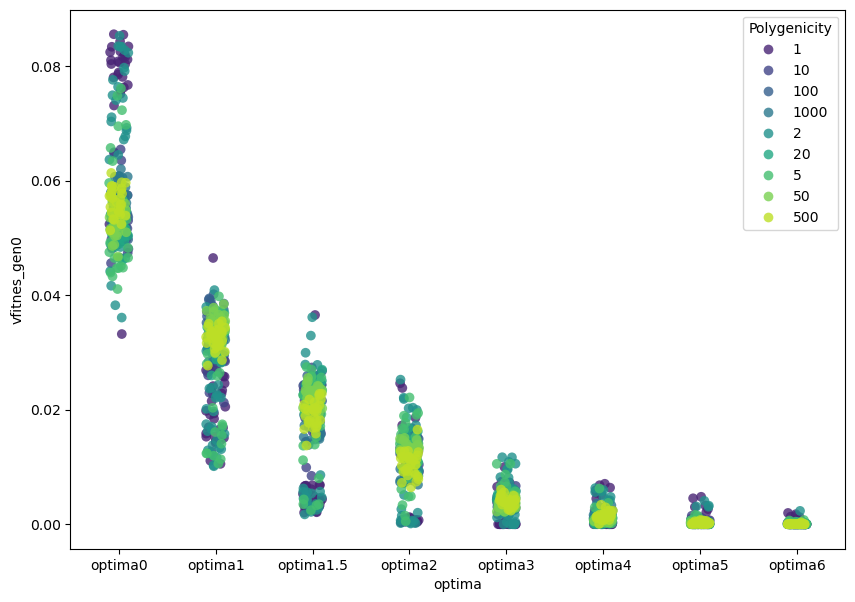

NameError: name 'mpatches' is not defined

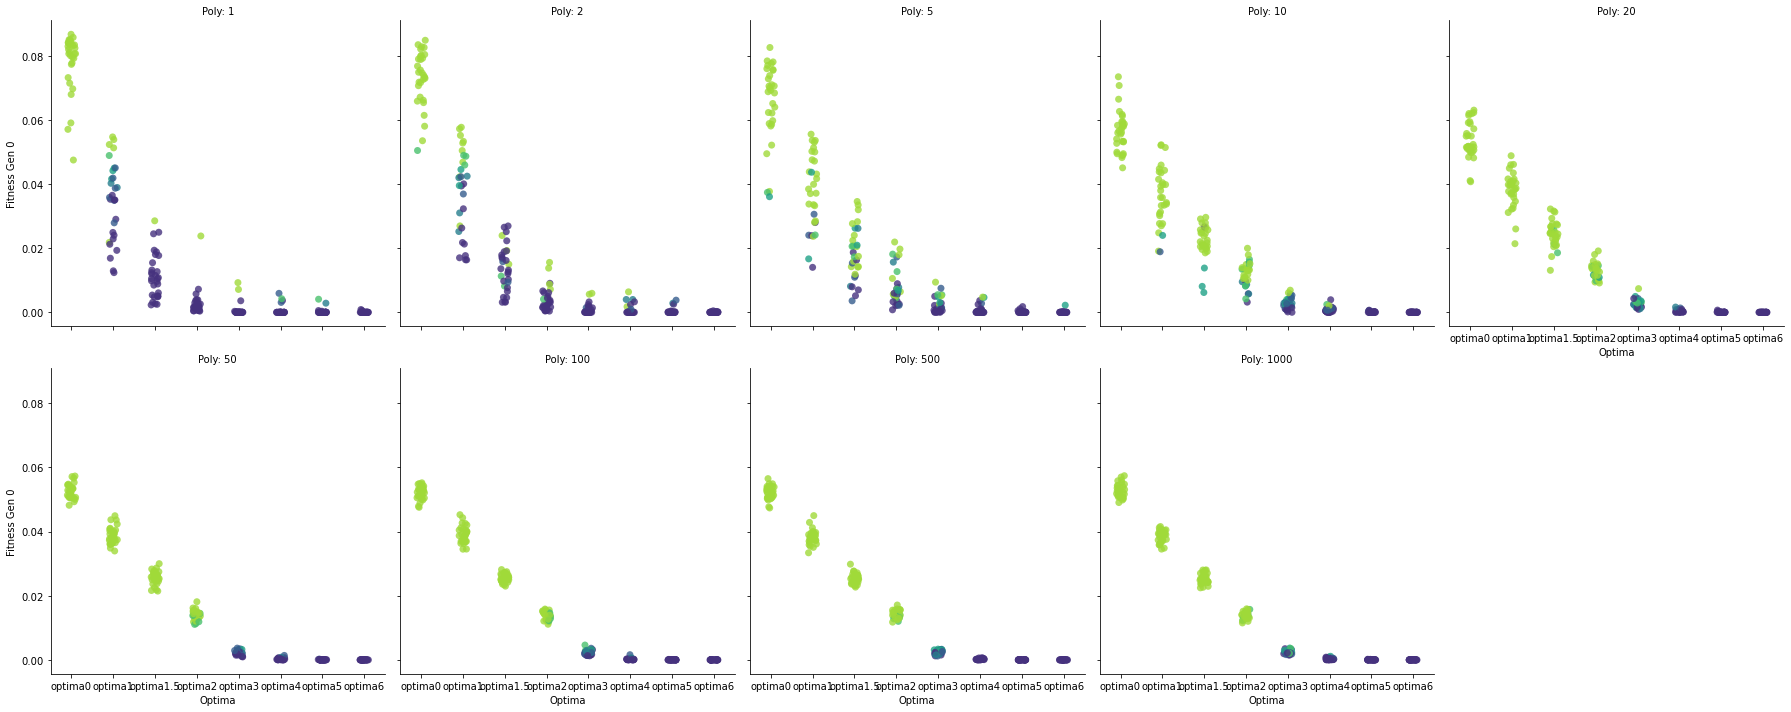

In [124]:


# Assuming survivalship_vfitnes_h07 is your DataFrame
# and optima_order and hue_order are defined

# Initialize the FacetGrid object
g = sns.FacetGrid(survivalship_vfitnes_h07, col="poly_str", col_wrap=5, height=5, aspect=1,
                  col_order=['1', '2', '5', '10', '20', '50', '100', '500', '1000'])

# Map the stripplot
g.map_dataframe(sns.stripplot, x="optima", y="vfitnes_gen0", hue="survival", palette="viridis", size=7, alpha=0.8, order=optima_order)

# Adjusting legend and titles
g.set_axis_labels("Optima", "Fitness Gen 0")
g.set_titles("Poly: {col_name}")

# Define your hue order here, assuming it's numeric or has a clear sort order
hue_order = sorted(survivalship_vfitnes_h07['survival'].unique())

# Create legend handles manually
handles = [mpatches.Patch(color=sns.color_palette("viridis", len(hue_order))[i], label=label) for i, label in enumerate(hue_order)]

# Add the legend to the figure
g.fig.legend(handles=handles, title='Survivalship', loc='upper right', bbox_to_anchor=(1.05, 1))

plt.show()



In [ ]:
survivalship_vfitnes

In [125]:
survivalship_vfitnes

optima         sel   h2  poly rep  survival  vfitnes_gen0  log_poly  \
22    optima0  estrongsel  0.1     1   3       0.0      0.021694  0.000000   
23    optima0  estrongsel  0.1     1  30       0.0      0.023771  0.000000   
24    optima0  estrongsel  0.1     1   4       0.0      0.022513  0.000000   
25    optima0  estrongsel  0.1     1   5       0.0      0.022864  0.000000   
26    optima0  estrongsel  0.1     1   6       0.0      0.021434  0.000000   
...       ...         ...  ...   ...  ..       ...           ...       ...   
367   optima0  estrongsel  0.5  1000  16       1.0      0.045570  6.907755   
6592  optima5  estrongsel  0.1  1000   3       0.0      0.006367  6.907755   
6593  optima5  estrongsel  0.1  1000  30       0.0      0.005835  6.907755   
6594  optima5  estrongsel  0.1  1000   4       0.0      0.007133  6.907755   
6595  optima5  estrongsel  0.1  1000   5       0.0      0.006316  6.907755   

     poly_str  
22          1  
23          1  
24          1  
25          1  
26          1  
...       ...  
367      1000  
6592     1000  
6593     1000  
6594     1000  
6595     1000  

[8640 rows x 9 columns]

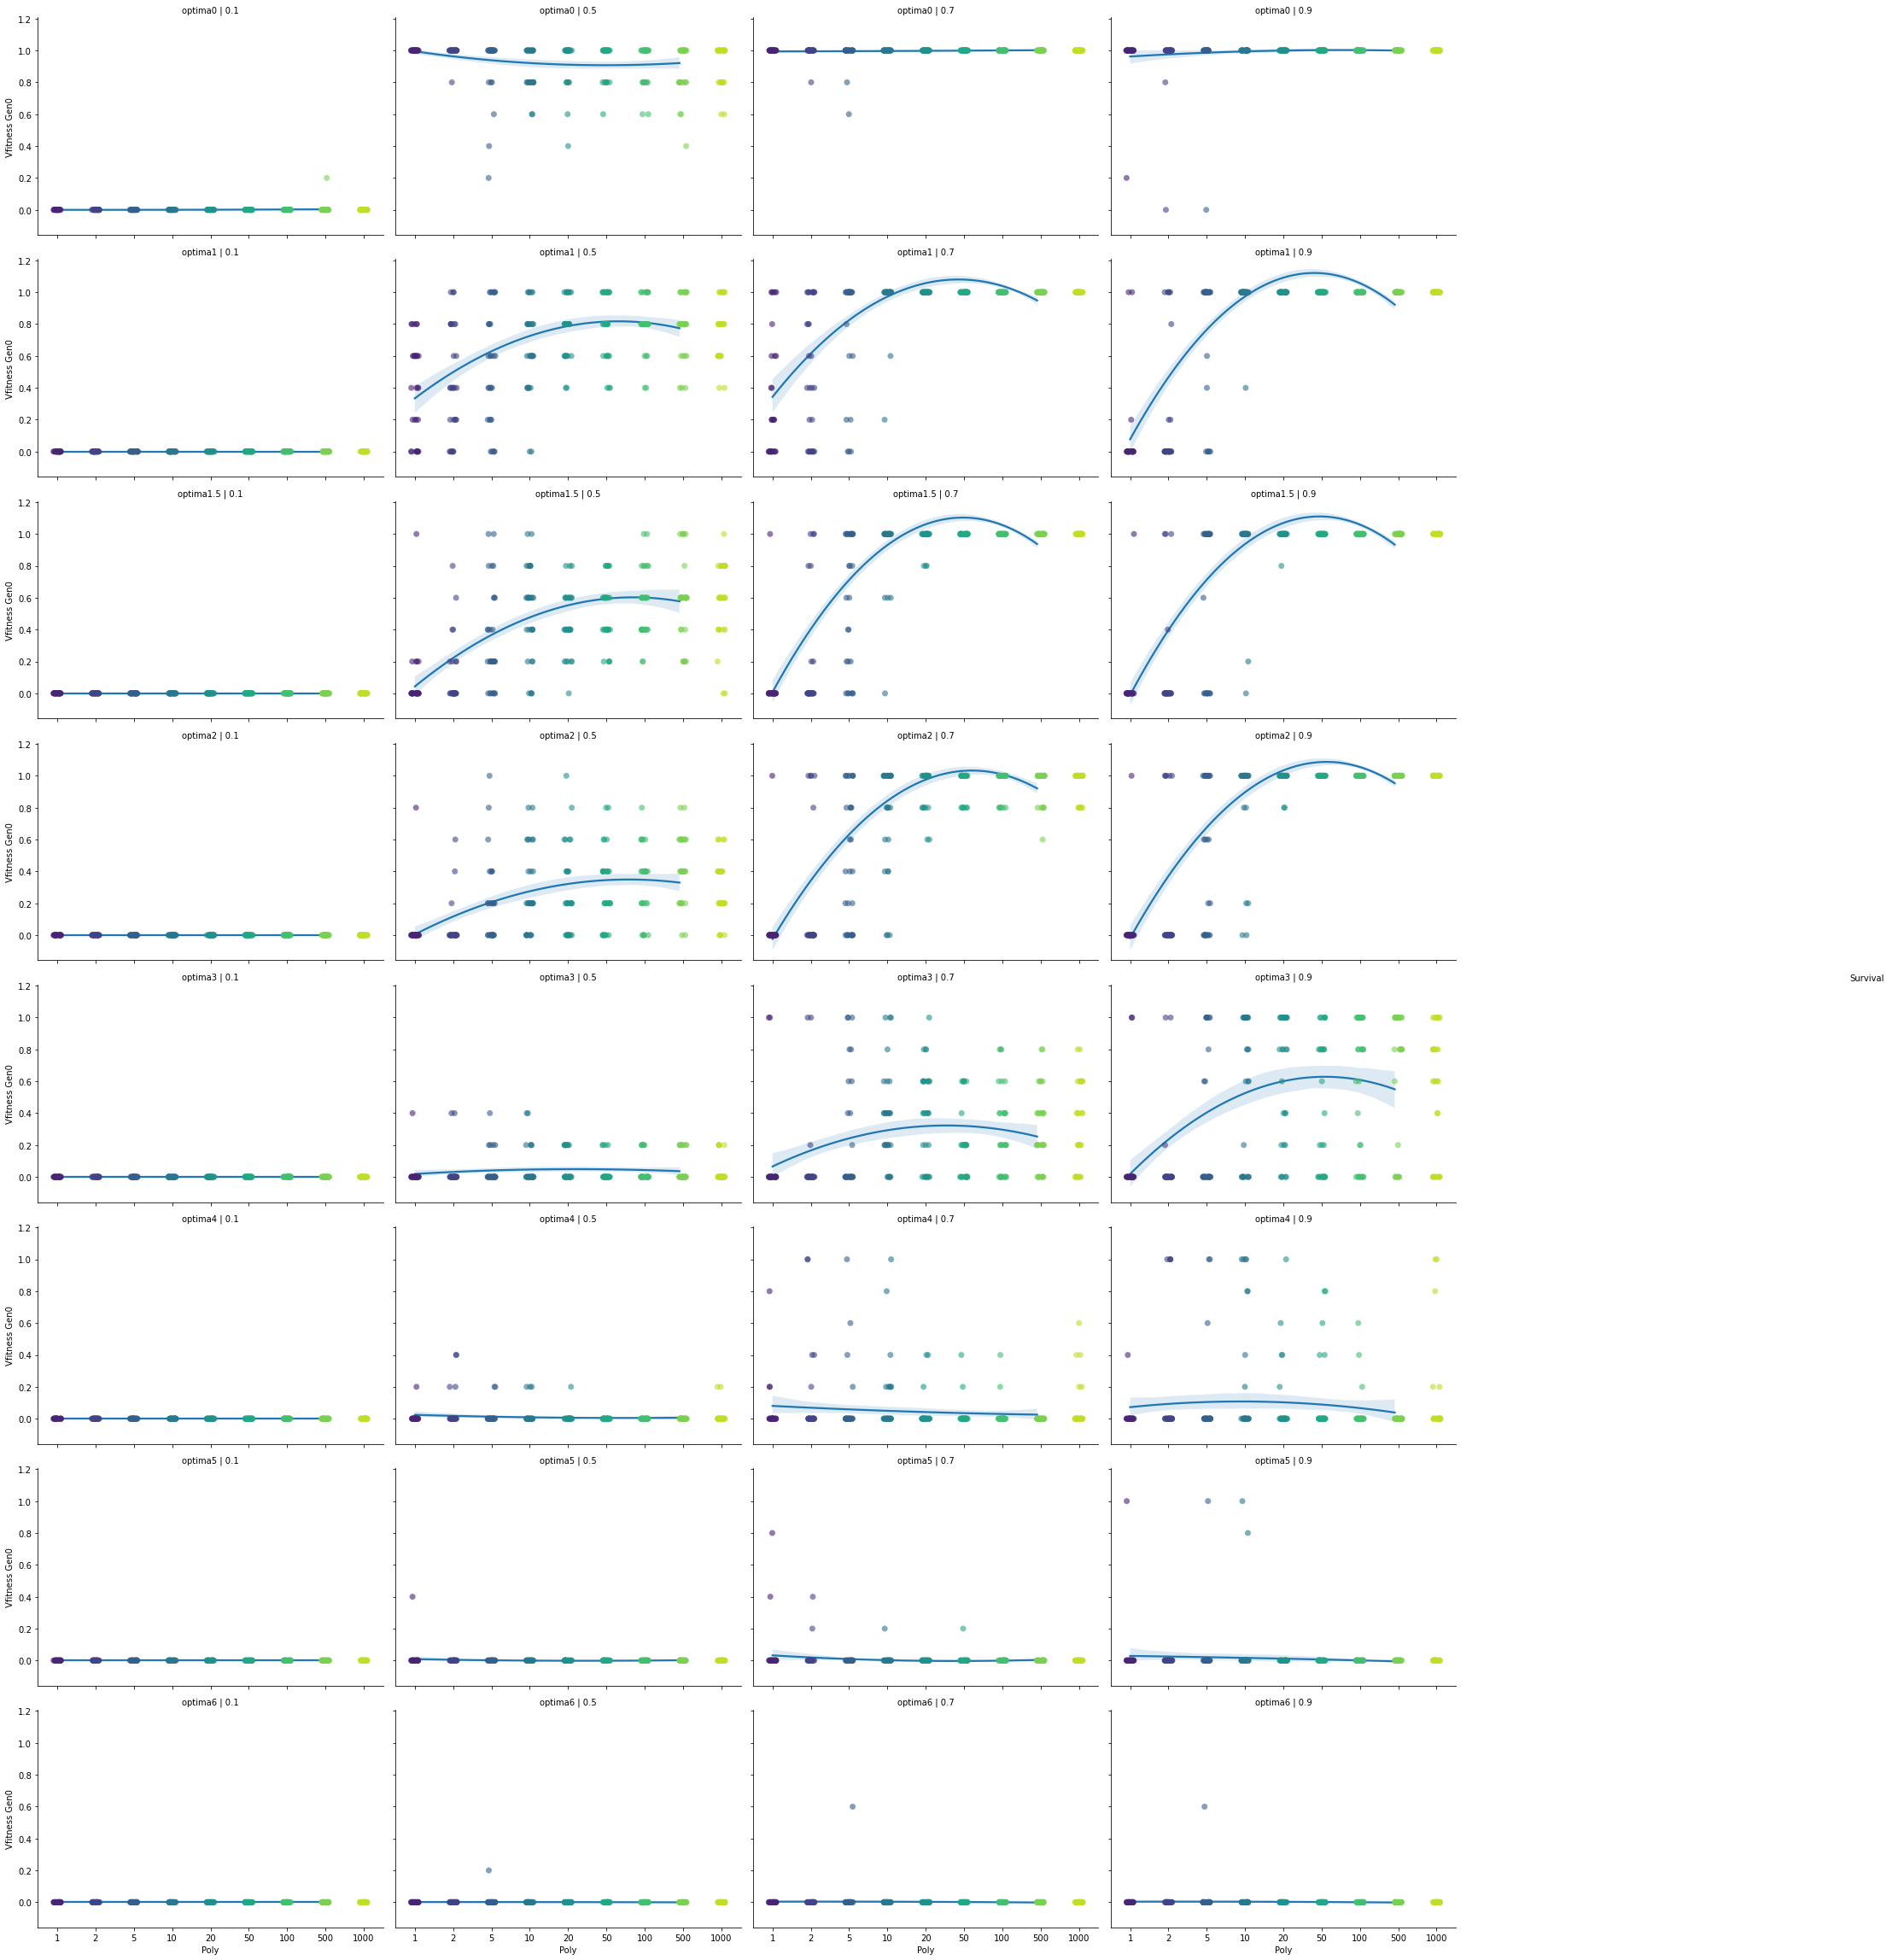

In [40]:
survivalship_vfitnes['log_poly'] = np.log(survivalship_vfitnes['poly'])

# Define the custom plotting function for regplot to be used with FacetGrid
def regplot_custom(*args, **kwargs):
    data = kwargs.pop('data')
    sns.regplot(x=args[0], y=args[1], data=data, scatter=False, order=2, **kwargs)

# Assuming survivalship_vfitnes is your DataFrame and it's already defined
# Set the color for regplot
#viridis_color_for_line = plt.cm.viridis(0.5)  # Halfway through the colormap

# Create a FacetGrid with 'h2' variants as columns and 'optima' variants as rows
g = sns.FacetGrid(survivalship_vfitnes, col="h2", row="optima", height=4, aspect=1.5,sharey=True,
                 row_order =optima_order)

# Use map to plot a stripplot on each subplot
# Note: Adjust the stripplot aesthetics as needed
g.map_dataframe(sns.stripplot, x="poly", y="survival", size=7, alpha=0.6, palette="viridis")

# Overlay regplot on each subplot using the custom plotting function
g.map_dataframe(regplot_custom, 'log_poly', 'survival')

# Adjust legend and labels as needed
# This places the legend outside the plots
g.add_legend(title='Survival', loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set_axis_labels("Poly", "Vfitness Gen0")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

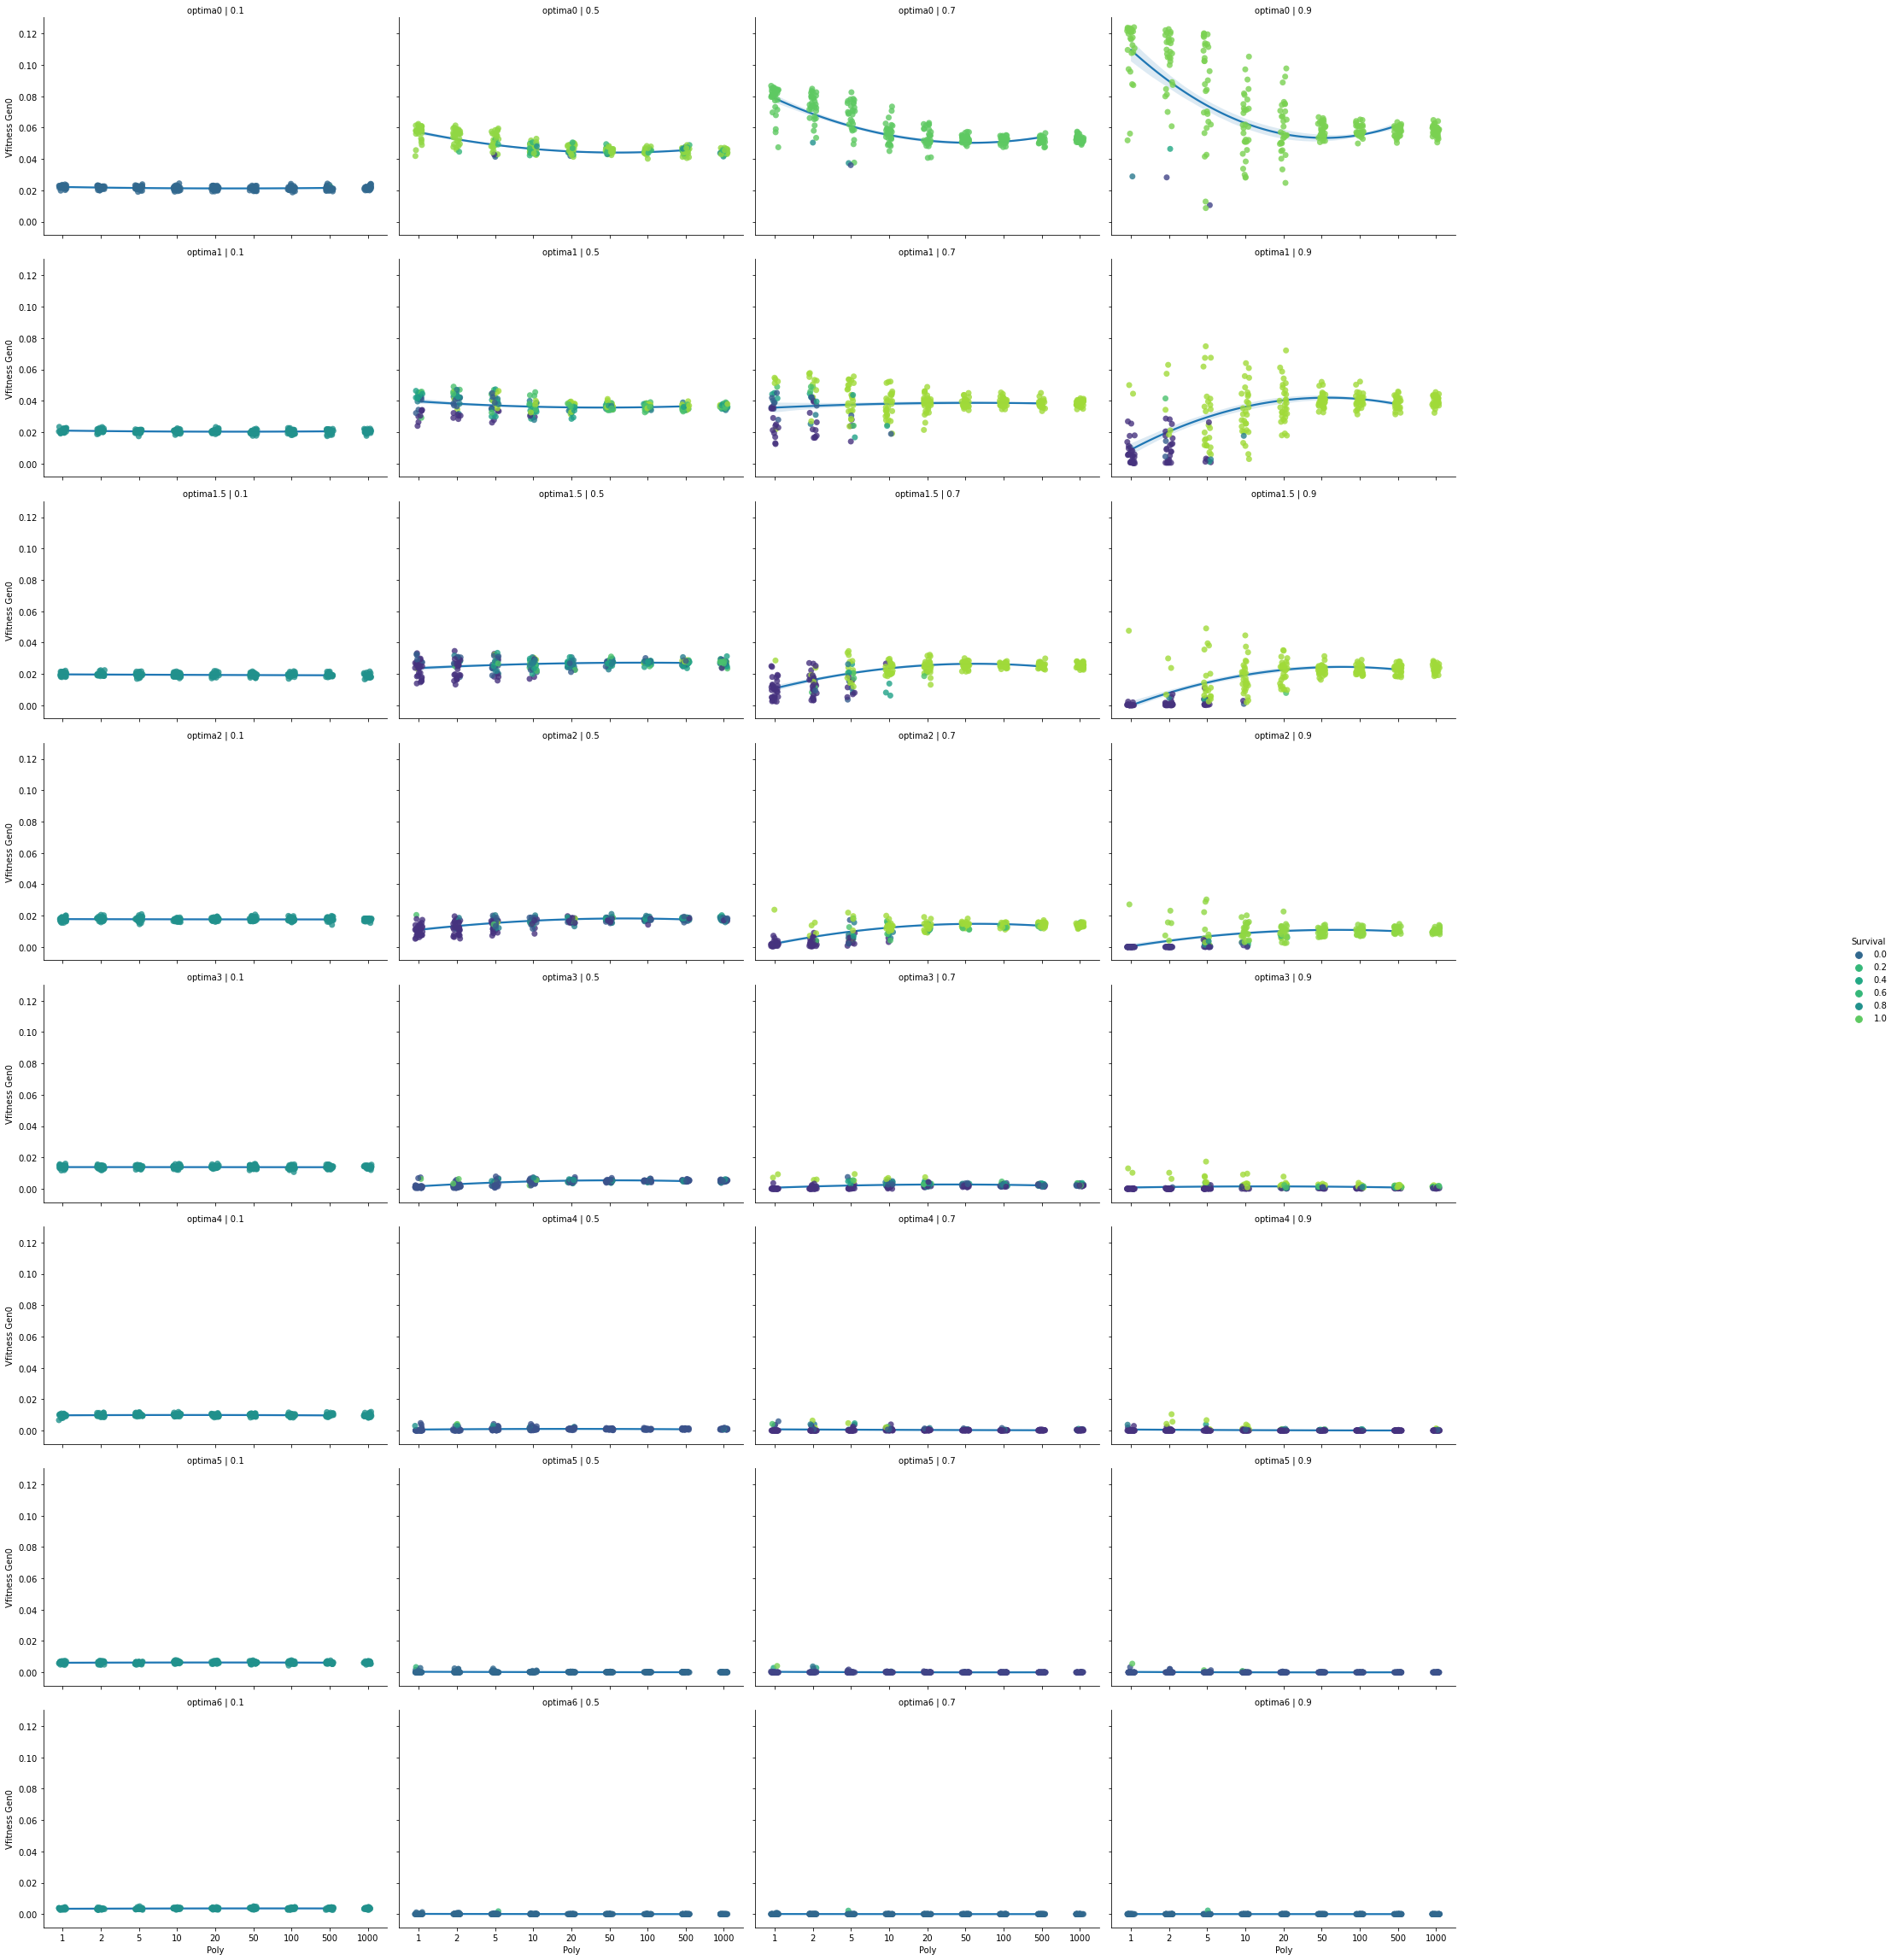

In [129]:
survivalship_vfitnes['log_poly'] = np.log(survivalship_vfitnes['poly'])

# Define the custom plotting function for regplot to be used with FacetGrid
def regplot_custom(*args, **kwargs):
    data = kwargs.pop('data')
    sns.regplot(x=args[0], y=args[1], data=data, scatter=False, order=2, **kwargs)

# Assuming survivalship_vfitnes is your DataFrame and it's already defined
# Set the color for regplot
#viridis_color_for_line = plt.cm.viridis(0.5)  # Halfway through the colormap

# Create a FacetGrid with 'h2' variants as columns and 'optima' variants as rows
g = sns.FacetGrid(survivalship_vfitnes, col="h2", row="optima", height=4, aspect=1.5,sharey=True, 
                 row_order = optima_order)

# Use map to plot a stripplot on each subplot
# Note: Adjust the stripplot aesthetics as needed
g.map_dataframe(sns.stripplot, x="poly", y="vfitnes_gen0", hue="survival", size=7, alpha=0.8, palette="viridis")

# Overlay regplot on each subplot using the custom plotting function
g.map_dataframe(regplot_custom, 'log_poly', 'vfitnes_gen0')

# Adjust legend and labels as needed
# This places the legend outside the plots
g.add_legend(title='Survival', loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set_axis_labels("Poly", "Vfitness Gen0")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()


In [130]:
survivalship_vfitnes = survivalship_vfitnes.sort_values('poly')

In [131]:
survivalship_vfitnes['optima'].unique()

array(['optima4', 'optima0', 'optima2', 'optima5', 'optima3', 'optima1.5',
       'optima6', 'optima1'], dtype=object)

In [132]:
survivalship_vfitnes['poly_str'] = survivalship_vfitnes['poly'].astype(str)

/carnegie/binaries/centos7/conda/3.7/envs/python_3.9/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/carnegie/binaries/centos7/conda/3.7/envs/python_3.9/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


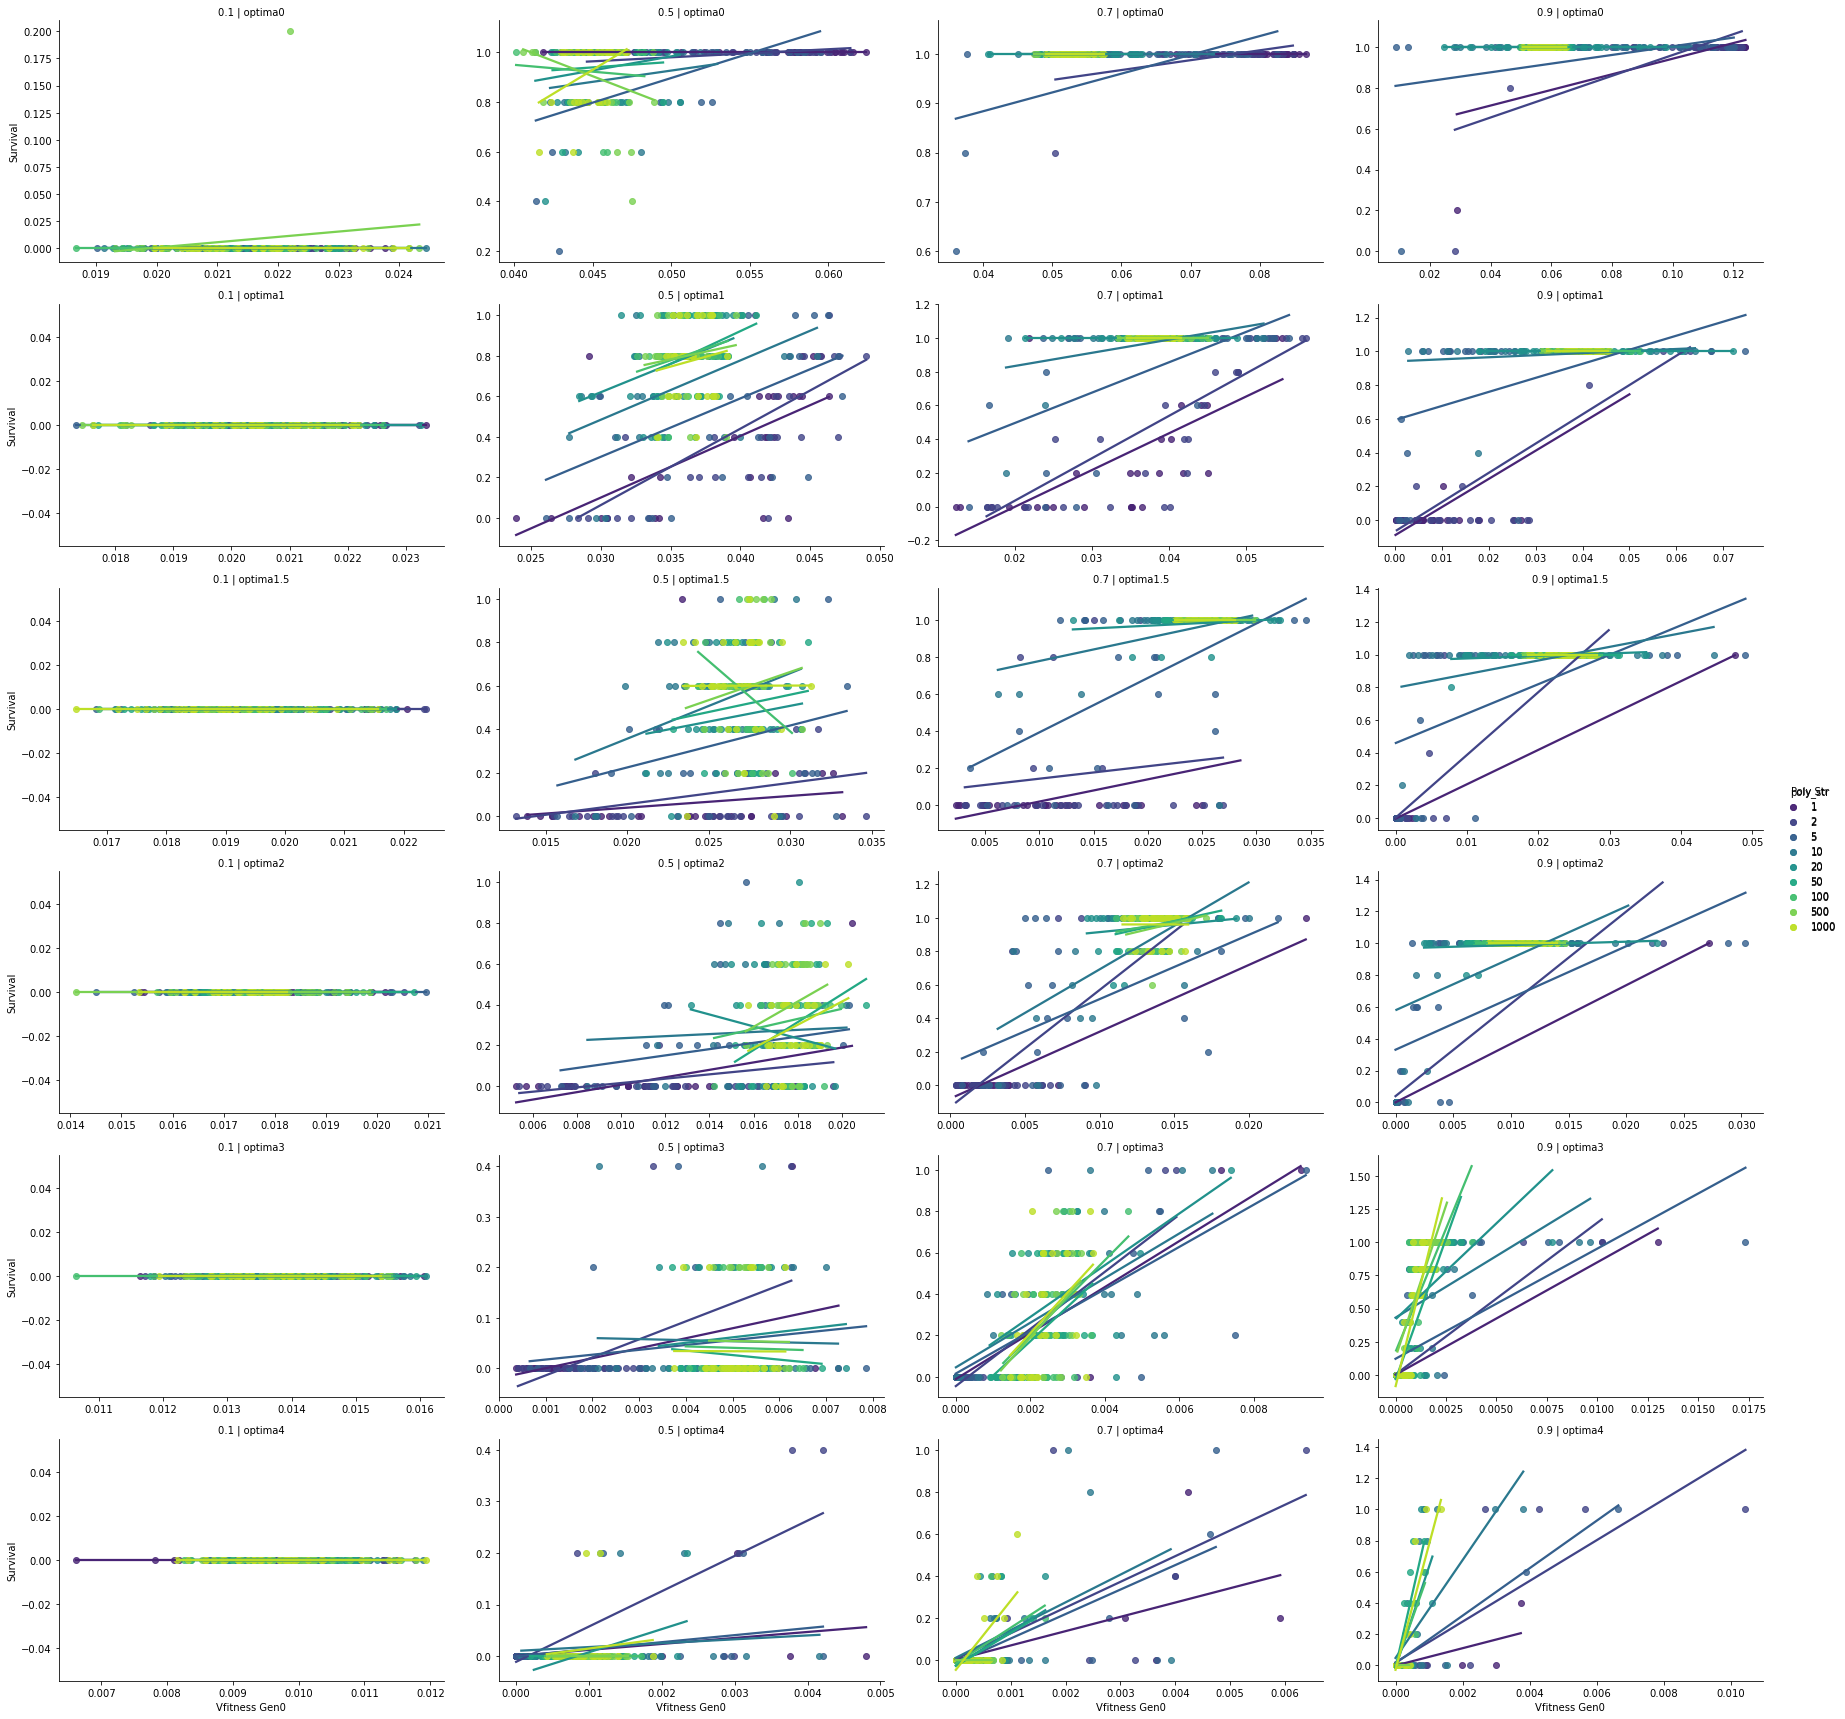

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming survivalship_vfitnes is your DataFrame and it's already defined

# Using sns.lmplot directly to create faceted plot
# Set the size and aspect ratio of each facet
lm = sns.lmplot(data=survivalship_vfitnes, x="vfitnes_gen0", y="survival", hue="poly_str", 
                hue_order = poly_str_order,
                row_order = ['optima0', 'optima1', 'optima1.5', 'optima2', 'optima3', 'optima4'],
                col="h2", row="optima", palette="viridis", 
                height=4, aspect=1.5, sharey=False, sharex=False, ci=None)

# Adjust the plot as needed, for example, setting titles or adjusting the legend
lm.set_titles("{col_name} | {row_name}")
lm.set_axis_labels("Vfitness Gen0", "Survival")
lm.add_legend(title="Poly Str")

plt.show()


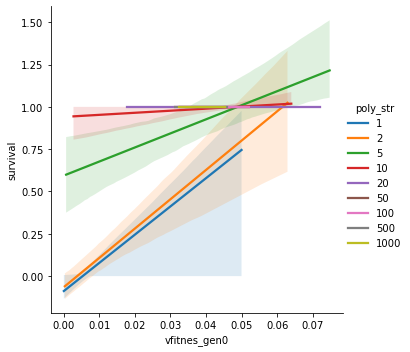

In [134]:
sns.lmplot(data=optima1_h2, x='vfitnes_gen0', y='survival', scatter=False, hue='poly_str')


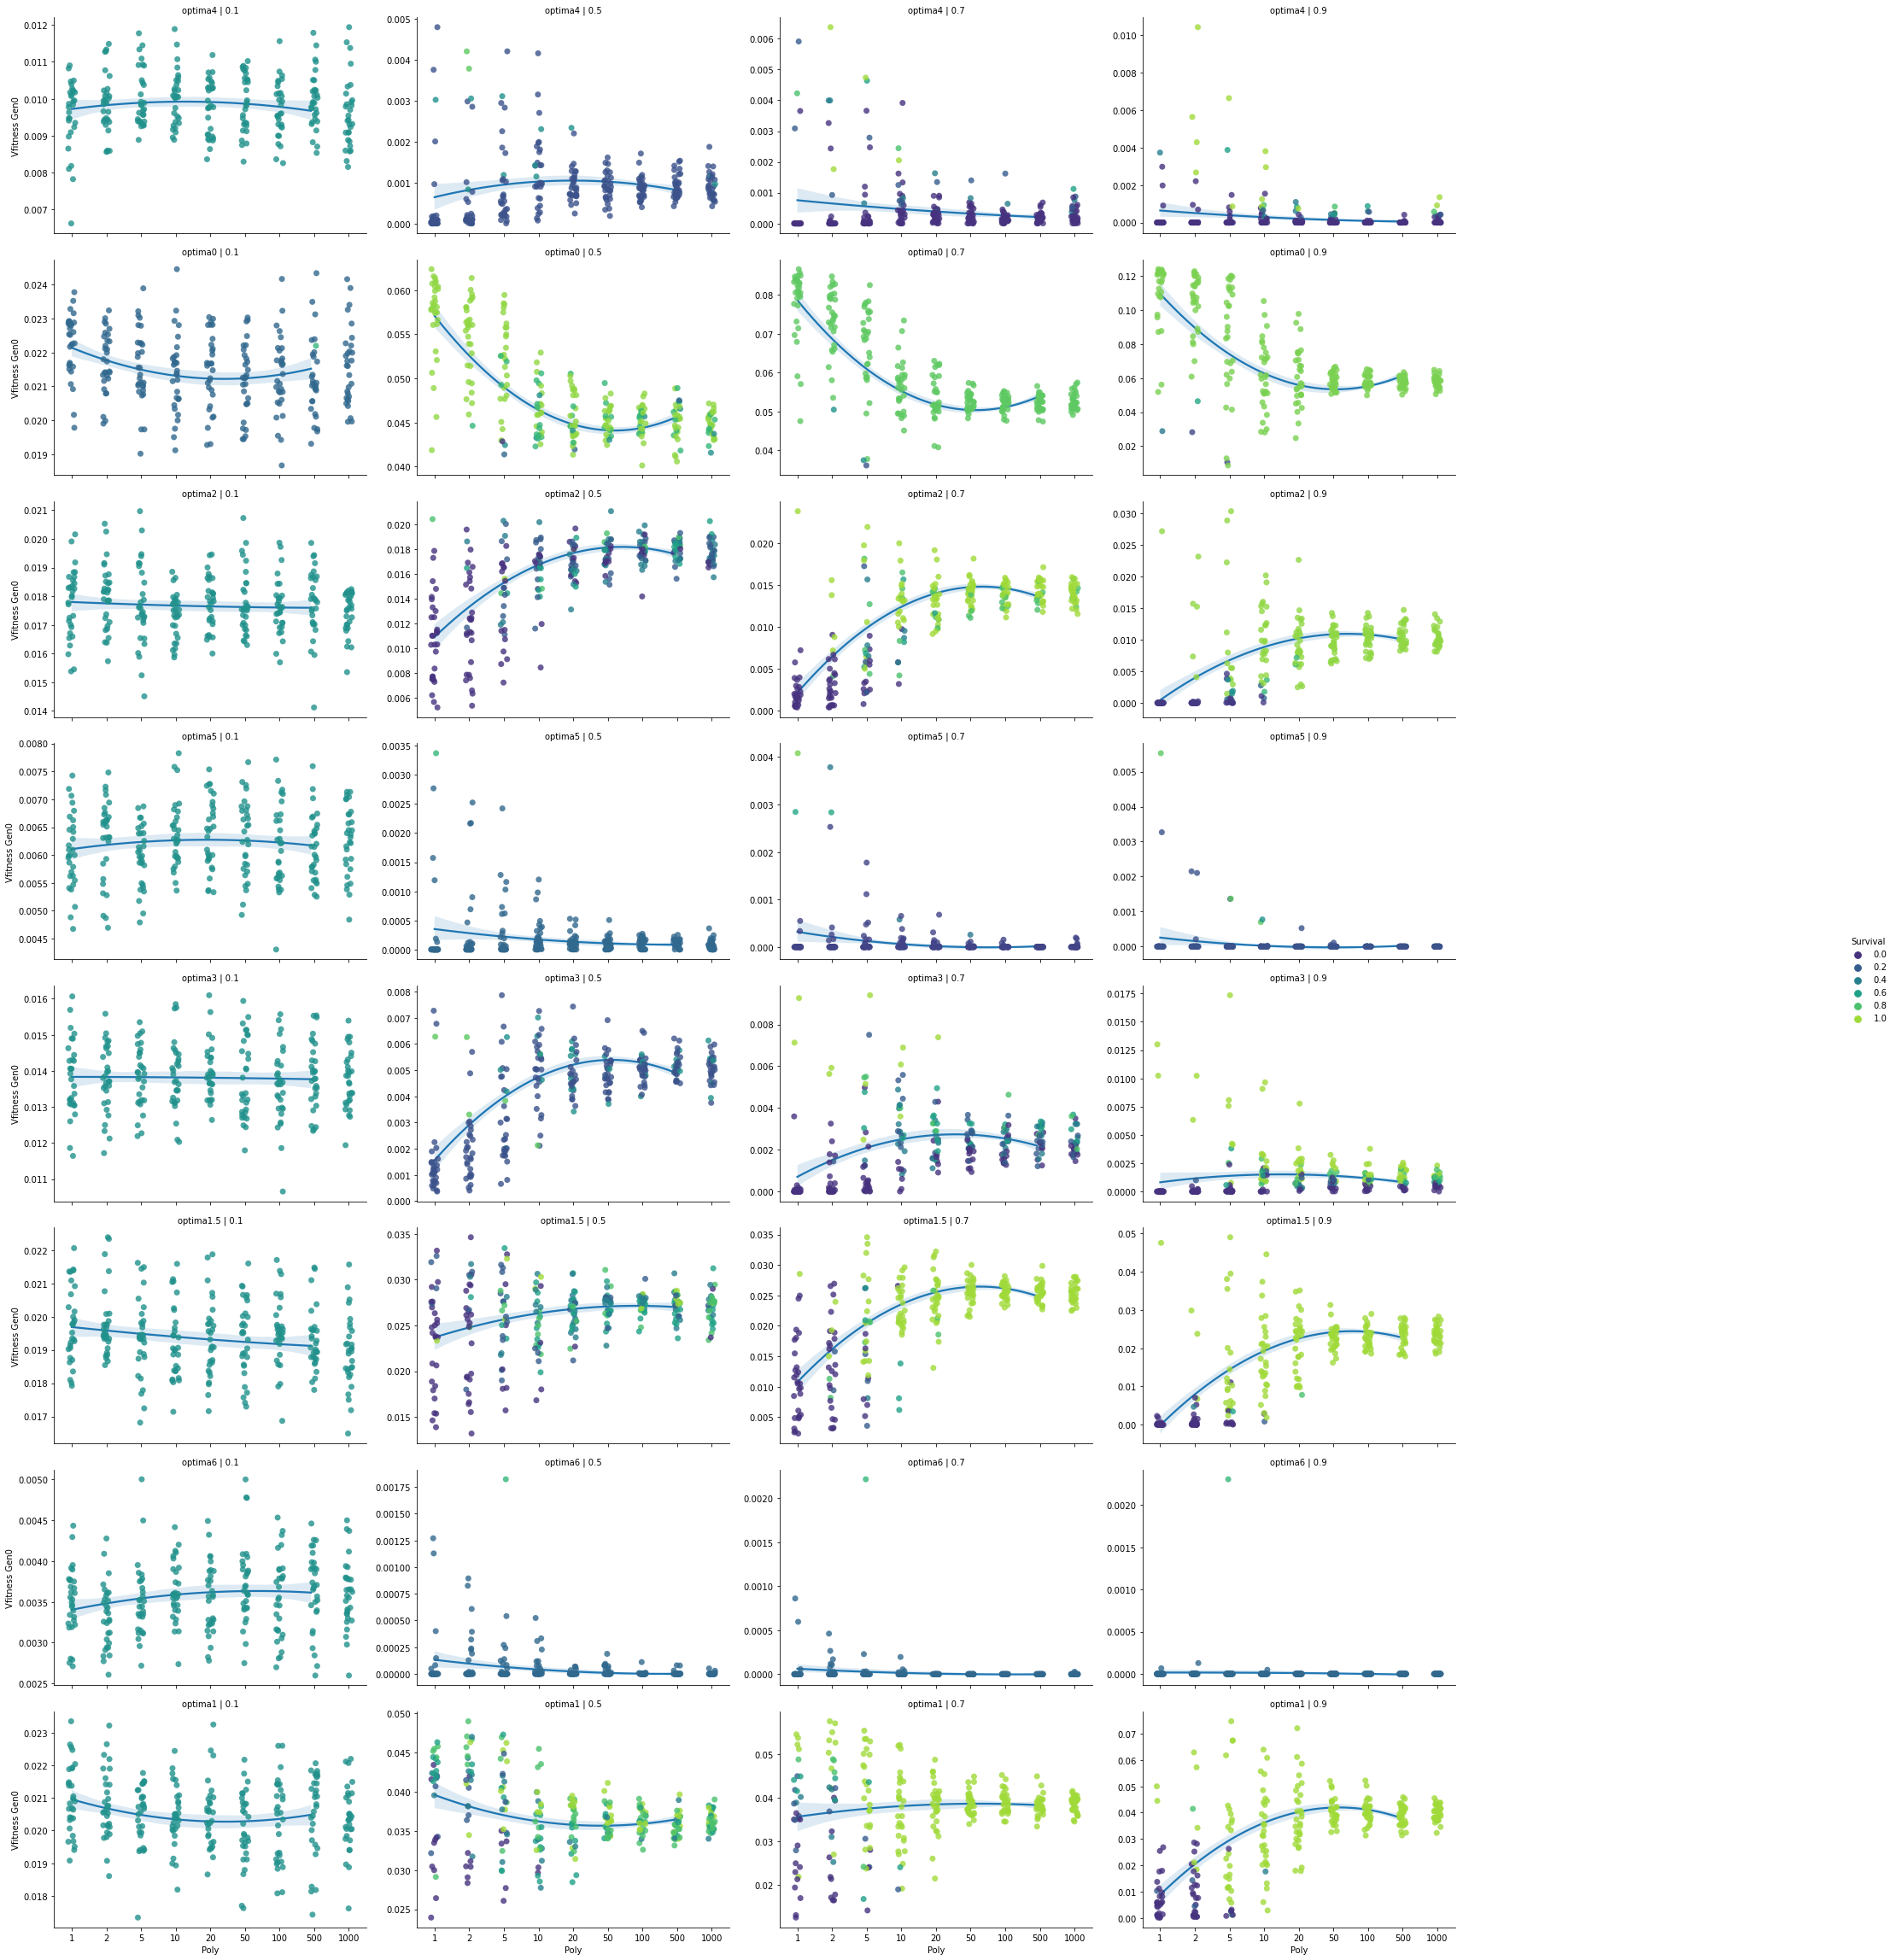

In [135]:
survivalship_vfitnes['log_poly'] = np.log(survivalship_vfitnes['poly'])

# Define the custom plotting function for regplot to be used with FacetGrid
def regplot_custom(*args, **kwargs):
    data = kwargs.pop('data')
    sns.regplot(x=args[0], y=args[1], data=data, scatter=False, order=2, **kwargs)

# Assuming survivalship_vfitnes is your DataFrame and it's already defined
# Set the color for regplot
#viridis_color_for_line = plt.cm.viridis(0.5)  # Halfway through the colormap

# Create a FacetGrid with 'h2' variants as columns and 'optima' variants as rows
g = sns.FacetGrid(survivalship_vfitnes, col="h2", row="optima", height=4, aspect=1.5,sharey=False)

# Use map to plot a stripplot on each subplot
# Note: Adjust the stripplot aesthetics as needed
g.map_dataframe(sns.stripplot, x="poly", y="vfitnes_gen0", hue="survival", size=7, alpha=0.8, palette="viridis")

# Overlay regplot on each subplot using the custom plotting function
g.map_dataframe(regplot_custom, 'log_poly', 'vfitnes_gen0')

# Adjust legend and labels as needed
# This places the legend outside the plots
g.add_legend(title='Survival', loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)
g.set_axis_labels("Poly", "Vfitness Gen0")
g.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.show()

In [ ]:
plt.figure(figsize=(10, 7)) 

sns.stripplot(data=optima1_h2, x='log_poly', y='survival', hue='vfitnes_gen0', alpha=0.7)
plt.legend([],[], frameon=False) # This removes the legend

/tmp/ipykernel_71196/248881153.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  optima1_h2.loc[:,'survival_jittered'] = optima1_h2.loc[:,'survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))


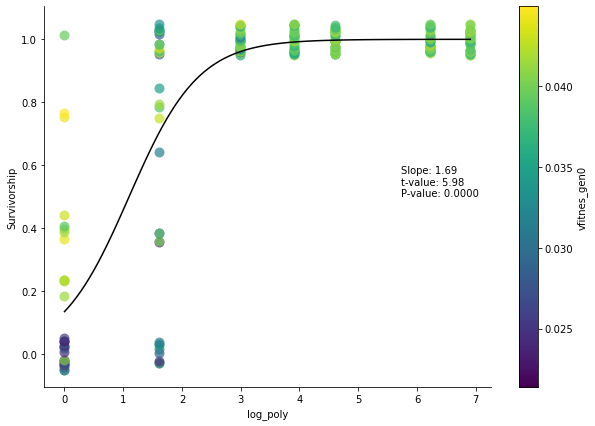

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# Your setup code remains the same...

# Generate predictions, etc.

# Define a continuous color palette for 'vfitnes_gen0'
norm = plt.Normalize(optima1_h2['vfitnes_gen0'].min(), optima1_h2['vfitnes_gen0'].max())
cmap = plt.cm.viridis

plt.figure(figsize=(10, 7))

# Create the color map based on 'vfitnes_gen0' values
colors = cmap(norm(optima1_h2['vfitnes_gen0']))


jitter_amount = 0.05  # Adjust this value as needed based on your data's scale
optima1_h2.loc[:,'survival_jittered'] = optima1_h2.loc[:,'survival'] + np.random.uniform(-jitter_amount, jitter_amount, size=len(optima1_h2))

# Plot each point manually, sorted within each 'survival_jittered' group by 'vfitnes_gen0'
for survival_value in sorted(optima1_h2['survival_jittered'].unique()):
    # Filter the data for the current survival_value
    subset = optima1_h2[optima1_h2['survival_jittered'] == survival_value]
    # Sort the subset by 'vfitnes_gen0'
    subset_sorted = subset.sort_values(by='vfitnes_gen0')
    # Plot the sorted points
    plt.scatter(subset_sorted['log_poly'], subset_sorted['survival_jittered'], c=cmap(norm(subset_sorted['vfitnes_gen0'])), alpha=0.7, s=100, linewidth=0)

# Plot logistic regression line
plt.plot(x_range, y_pred, color='black', label='Logit Model')

# Create color bar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='vfitnes_gen0')

# Adding text and labels
plt.text(0.8, 0.5, f'Slope: {slope:.2f}\nt-value: {t_value:.2f}\nP-value: {p_value:.4f}', transform=plt.gca().transAxes)
plt.xlabel('log_poly')
plt.ylabel('Survivorship')
sns.despine()

plt.show();


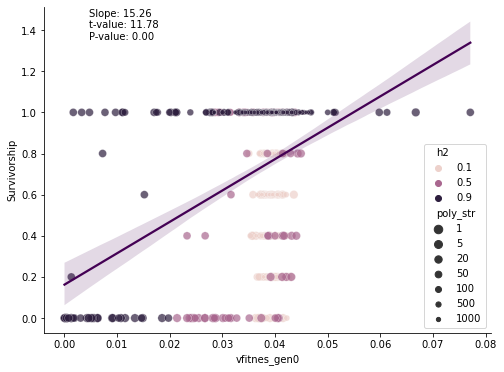

In [145]:


# Assuming 'test' is your DataFrame with 'poly' and 'survival' columns

# Predictor and Response remain the same
X = survivalship_vfitnes['vfitnes_gen0']  # Predictor
y = survivalship_vfitnes['survival']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['vfitnes_gen0']
p_value = linear_res.pvalues['vfitnes_gen0']
t_value = slope / linear_res.bse['vfitnes_gen0']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=survivalship_vfitnes, x='vfitnes_gen0', y='survival', hue = 'h2', size="poly_str", alpha =.7)

sns.regplot(data=survivalship_vfitnes, x='vfitnes_gen0', y='survival', scatter=False, color="#440154")
plt.text(0.1, 0.9, f'Slope: {slope:.2f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('vfitnes_gen0')
plt.ylabel('Survivorship')
sns.despine()

plt.show()

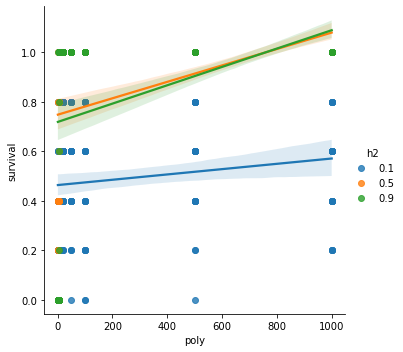

In [152]:
g = sns.lmplot(
    data=survivalship_vfitnes,
    x="poly", y="survival", hue="h2",
    height=5
)


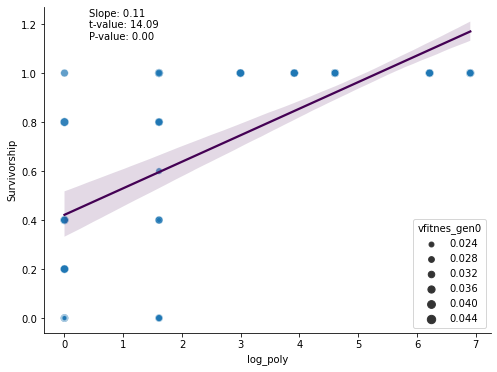

In [150]:


# Assuming 'test' is your DataFrame with 'poly' and 'survival' columns

# Predictor and Response remain the same
X = optima1_h2['log_poly']  # Predictor
y = optima1_h2['survival']  # Response

# Adding a constant to the predictor for the intercept
x_with_intercept = sm.add_constant(X)

# Fit the model using Ordinary Least Squares (OLS) instead of Logistic Regression
linear_mod = sm.OLS(y, x_with_intercept)
linear_res = linear_mod.fit()  # Regularization is not used in OLS

# Get the slope (coefficient of 'poly') and p-value
slope = linear_res.params['log_poly']
p_value = linear_res.pvalues['log_poly']
t_value = slope / linear_res.bse['log_poly']

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(data=optima1_h2, x='log_poly', y='survival', size = 'vfitnes_gen0', alpha =.7) # size="poly_str", 

sns.regplot(data=optima1_h2, x='log_poly', y='survival', scatter=False, color="#440154")
plt.text(0.1, 0.9, f'Slope: {slope:.2f}\nt-value: {t_value:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes)  # Adjust position as needed
plt.xlabel('log_poly')
plt.ylabel('Survivorship')
sns.despine()

plt.show()

In [105]:
optima1_h2

optima         sel   h2  poly rep  survival  vfitnes_gen0  log_poly
840   optima1  estrongsel  0.5     1   1       0.0      0.037383  0.000000
841   optima1  estrongsel  0.5     1  10       0.0      0.025521  0.000000
842   optima1  estrongsel  0.5     1  11       0.2      0.039170  0.000000
843   optima1  estrongsel  0.5     1  12       1.0      0.039386  0.000000
844   optima1  estrongsel  0.5     1  13       0.4      0.043160  0.000000
...       ...         ...  ...   ...  ..       ...           ...       ...
1045  optima1  estrongsel  0.5  1000   5       1.0      0.042801  6.907755
1046  optima1  estrongsel  0.5  1000   6       1.0      0.036750  6.907755
1047  optima1  estrongsel  0.5  1000   7       1.0      0.040110  6.907755
1048  optima1  estrongsel  0.5  1000   8       1.0      0.040889  6.907755
1049  optima1  estrongsel  0.5  1000   9       1.0      0.037299  6.907755

[210 rows x 8 columns]

In [4]:




vfitnes = get_params(vfitnes)

vfitnes['vfitnes']=  vfitnes['9']
#vfitnes['vfitnes'] = vfitnes['vfitnes'].fillna(0)

vfitnes = vfitnes[['optima', 'h2', 'poly', 'rep', 'vfitnes']]

vfitnes.loc[:, 'poly'] = vfitnes['poly'].replace(poligenicity_data)

vfitnes.loc[:, 'h2'] = vfitnes['h2'].replace(heritability_data)

## for now lets focus on 1 cusal locus 

vfitnes1 = vfitnes[(vfitnes['optima'] == 'optima0')] #& (vfitnes['h2'] == 0.9)]

poly_levels = [1, 5, 20, 50, 100, 500, 1000]

In [5]:
vfitnes1

optima   h2  poly rep   vfitnes
5      optima0  0.5  1000   8  0.461783
6      optima0  0.5  1000   8  0.455779
7      optima0  0.5  1000   8  0.453147
8      optima0  0.5  1000   8  0.448335
9      optima0  0.5  1000   8  0.465618
...        ...  ...   ...  ..       ...
15730  optima0  0.1    50  25  0.132849
15731  optima0  0.1    50  25  0.138671
15732  optima0  0.1    50  25  0.117796
15733  optima0  0.1    50  25  0.136334
15734  optima0  0.1    50  25  0.137857

[3150 rows x 5 columns]